## Contents <a id="top"></a>
### [1. HR Analytics](#HR_Analytics)
   - [1.1. Load and Explore the data](#1.1.)
       - [1.1.1. Stratified Sampling](#1.1.1.)   
       - [1.1.2. Statistical Approach](#1.1.2.)      
       - [1.1.3. Visualization Approach](#1.1.3.)     


   - [1.2. Cleanse and Transform the data](#1.2.)
       - [1.2.1. Outliers](#1.2.1.)
       - [1.2.2. Missing Value Imputation](#1.2.2.)     
       - [1.2.3. Categorical Data Transformation](#1.2.3.)      
       - [1.2.4. Numerical Data Transformation](#1.2.4.)
       - [1.2.5. Numerical Data (Discretization)](#1.2.5.)
       - [1.2.6. Feature Scaling](#1.2.6.)
       
       
   - [1.3. Correlation Analysis](#1.3.)       
   - [1.4. Export the data](#1.4.)           
       
       
### [2. Airbnb](#AIRBNB)       
   - [2.1. Load and Explore the data](#2.1.)
       - [2.1.1. Subset of Data](#2.1.1.)   
       - [2.1.2. Statistical Approach](#2.1.2.)   
       - [2.1.3. Visualization Approach](#2.1.3.)   


   - [2.2. Cleanse and Transform the data](#2.2.)
       - [2.2.1. Outliers](#2.2.1.)
       - [2.2.2. Extract Features from Unstructured Data](#2.2.2.)              
       - [2.2.3. Missing Value Imputation](#2.2.3.)   
       - [2.2.4. Categorical Data Transformation](#2.2.4.)          
       - [2.2.5. Numerical Data Transformation](#2.2.5.)        
       - [2.2.6. Numerical Data (Discretization)](#2.2.6.)        
       - [2.2.7. Feature Scaling](#2.2.7.)


   - [2.3. Correlation Analysis](#2.3.)
   
   - [2.4. Export the data](#2.4.)   
   

In [1]:
# import the packages
import pandas as pd
import numpy as np
%matplotlib inline
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# for Q-Q plots
import scipy.stats as stats

# Dealing with outliers
from feature_engine.outliers import Winsorizer

# Transforming numerical variables 
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import PowerTransformer
from feature_engine.transformation import ReciprocalTransformer
from feature_engine.transformation import BoxCoxTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# to split the data sets
from sklearn.model_selection import train_test_split

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer

from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi

# for encoding with feature-engine
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder
from feature_engine.encoding import OneHotEncoder

from feature_engine.encoding import CountFrequencyEncoder
# for discretization
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler
# the scalers - for mean normalisation
from sklearn.preprocessing import RobustScaler
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler
# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler

# Machine Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 1. HR Analytics <a id="1.HR_Analytics"></a>
[Back to Top](#top)

### 1.1. Load and Explore the data  <a id="1.1."></a>
[Back to Top](#top)

In [2]:
df_hr_ori = pd.read_csv("./datasets/hr_data.csv")
df_hr_backup = df_hr_ori.copy() #keep a copy of df 

In [3]:
df_hr_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
df_hr_ori.head()

employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   
3                 10              0            0                  50   
4                  2              0            0                  73   

   is_promoted  
0            0  
1            0  
2            0  
3            0  
4            0

In [5]:
# % of null values
df_hr_ori.isnull().mean()

employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

### 1.1.1.Stratified Sampling <a id="1.1.1."></a>
[Back to Top](#top)

In [6]:
# Show count for binary classification problem 
df_hr_ori['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [7]:
# New dataframe for 'is_promoted' == 1 
df_hr_1 = df_hr_ori[df_hr_ori['is_promoted']==1]
df_hr_1['is_promoted'].value_counts()

1    4668
Name: is_promoted, dtype: int64

In [8]:
# New dataframe for 'is_promoted' == 0 
df_hr_0 = df_hr_ori[df_hr_ori['is_promoted']==0]
df_hr_0['is_promoted'].value_counts()

0    50140
Name: is_promoted, dtype: int64

In [9]:
# Sampling for count of 'is_promoted' == 0 to be same as 'is_promoted' == 1
df_hr_0_sampled = df_hr_0.sample(n=len(df_hr_1), random_state=999).copy()
df_hr_0_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4668 entries, 13444 to 50304
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           4668 non-null   int64  
 1   department            4668 non-null   object 
 2   region                4668 non-null   object 
 3   education             4447 non-null   object 
 4   gender                4668 non-null   object 
 5   recruitment_channel   4668 non-null   object 
 6   no_of_trainings       4668 non-null   int64  
 7   age                   4668 non-null   int64  
 8   previous_year_rating  4318 non-null   float64
 9   length_of_service     4668 non-null   int64  
 10  KPIs_met >80%         4668 non-null   int64  
 11  awards_won?           4668 non-null   int64  
 12  avg_training_score    4668 non-null   int64  
 13  is_promoted           4668 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 547.0+ KB


In [10]:
# Count of 0s 
df_hr_0_sampled['is_promoted'].value_counts()

0    4668
Name: is_promoted, dtype: int64

In [11]:
# New dataframe after performing Stratified Sampling
df_hr_new=pd.concat([df_hr_1,df_hr_0_sampled],axis=0)
df_hr_new['is_promoted'].value_counts()

1    4668
0    4668
Name: is_promoted, dtype: int64

In [12]:
df_hr_new.info()
# Only null values found in 'education' and 'preious_year_rating'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 50304
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           9336 non-null   int64  
 1   department            9336 non-null   object 
 2   region                9336 non-null   object 
 3   education             8993 non-null   object 
 4   gender                9336 non-null   object 
 5   recruitment_channel   9336 non-null   object 
 6   no_of_trainings       9336 non-null   int64  
 7   age                   9336 non-null   int64  
 8   previous_year_rating  8647 non-null   float64
 9   length_of_service     9336 non-null   int64  
 10  KPIs_met >80%         9336 non-null   int64  
 11  awards_won?           9336 non-null   int64  
 12  avg_training_score    9336 non-null   int64  
 13  is_promoted           9336 non-null   int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.1+ MB


### 1.1.2. Statistical Approach <a id="1.1.2."></a>
[Back to Top](#top)

In [13]:
# Show description of data for numercial data
df_hr_new.describe()

employee_id  no_of_trainings          age  previous_year_rating  \
count   9336.000000      9336.000000  9336.000000           8647.000000   
mean   39150.316731         1.230827    34.561054              3.635481   
std    22722.283603         0.567611     7.389212              1.209638   
min        2.000000         1.000000    20.000000              1.000000   
25%    19380.750000         1.000000    29.000000              3.000000   
50%    39301.500000         1.000000    33.000000              4.000000   
75%    59013.500000         1.000000    38.000000              5.000000   
max    78292.000000         6.000000    60.000000              5.000000   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
count        9336.000000    9336.000000  9336.000000         9336.000000   
mean            5.752356       0.511889     0.066517           66.988325   
std             4.144232       0.499885     0.249196           14.568699   
min             1.000000       0.000000     0.000000           39.000000   
25%             3.000000       0.000000     0.000000           54.000000   
50%             5.000000       1.000000     0.000000           64.000000   
75%             7.000000       1.000000     0.000000           80.000000   
max            34.000000       1.000000     1.000000           99.000000   

       is_promoted  
count  9336.000000  
mean      0.500000  
std       0.500027  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max       1.000000

In [14]:
# Display percentage of null values
df_hr_new.isnull().mean()

employee_id             0.00000
department              0.00000
region                  0.00000
education               0.03674
gender                  0.00000
recruitment_channel     0.00000
no_of_trainings         0.00000
age                     0.00000
previous_year_rating    0.07380
length_of_service       0.00000
KPIs_met >80%           0.00000
awards_won?             0.00000
avg_training_score      0.00000
is_promoted             0.00000
dtype: float64

### 1.1.3. Visualization Approach <a id="1.1.3."></a>
[Back to Top](#top)

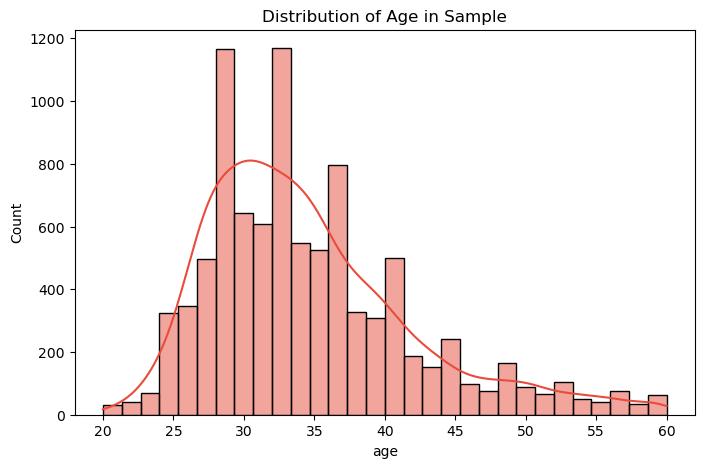

In [15]:
# Create a figure and subplot
fig, ageDistribution = plt.subplots(figsize=(8,5))

# Plot histogram
ageDistribution = sns.histplot(df_hr_new['age'], bins=30, kde=True, color='#E74C3C')
plt.title('Distribution of Age in Sample')

# Display box plot
plt.show()

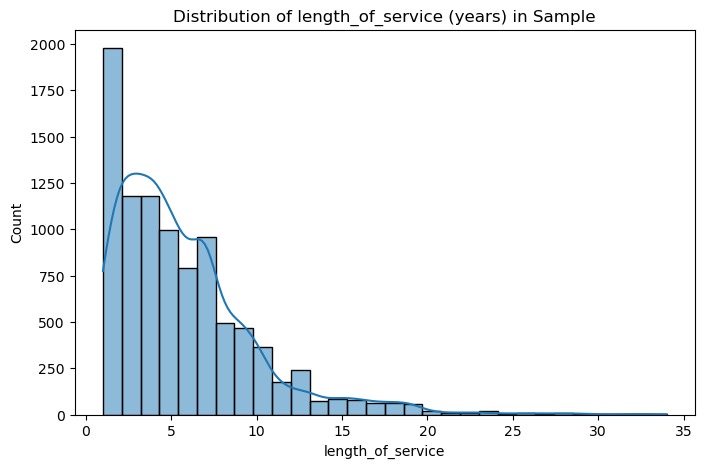

In [16]:
# Create a figure and subplot
fig, serviceDistribution = plt.subplots(figsize=(8,5))

# Plot histogram
serviceDistribution = sns.histplot(df_hr_new['length_of_service'], bins=30, kde=True)
plt.title('Distribution of length_of_service (years) in Sample')

# Display box plot
plt.show()

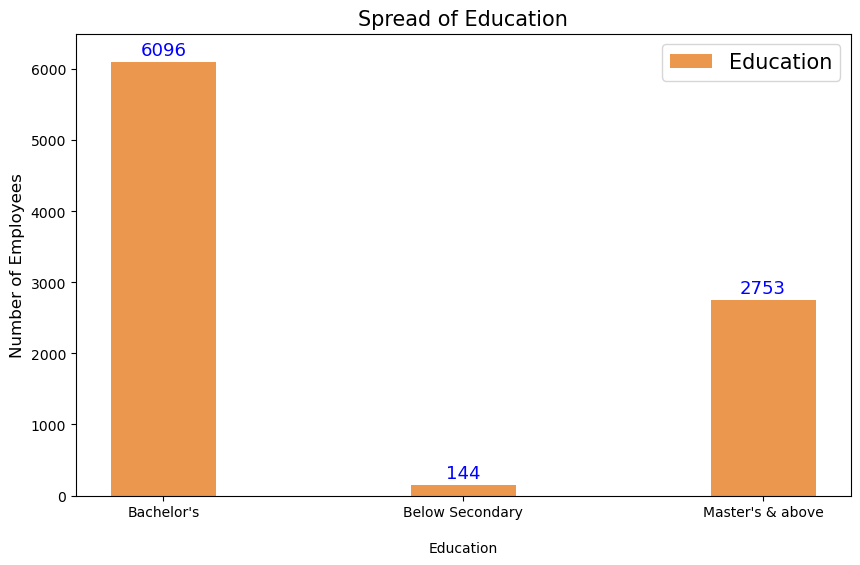

In [17]:
df_hr_EducationPromotion = df_hr_new.groupby('education')['is_promoted'].count()

# Define x-axis and y-axis data values
x_labels = df_hr_EducationPromotion.index

# Set the label locations and width of the bars
x = np.arange(len(x_labels))
width = 0.35


# Create a figure and subplot
fig, educationBarChart = plt.subplots(figsize=(10,6)) 

# Plot side-by-side bars
educationBar = educationBarChart.bar(x, df_hr_EducationPromotion, width, label='Education',color="#EB984E")

# Customise the plot
educationBarChart.set_title('Spread of Education', fontsize = 15)
educationBarChart.set_ylabel('Number of Employees', fontsize = 12)
educationBarChart.set_xlabel('\nEducation', fontsize = 10)
educationBarChart.set_xticks(x)
educationBarChart.set_xticklabels(x_labels,size=10)
educationBarChart.set_ylim(bottom = 0, top = 6500)
educationBarChart.legend(fontsize = 15)

# Create a function to display data labels/annotations for each bar
def autolabel(bars,ax):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',size = 13,color='b')
        
# Use function to display data labels for both bars
autolabel(educationBar,educationBarChart)

plt.show()

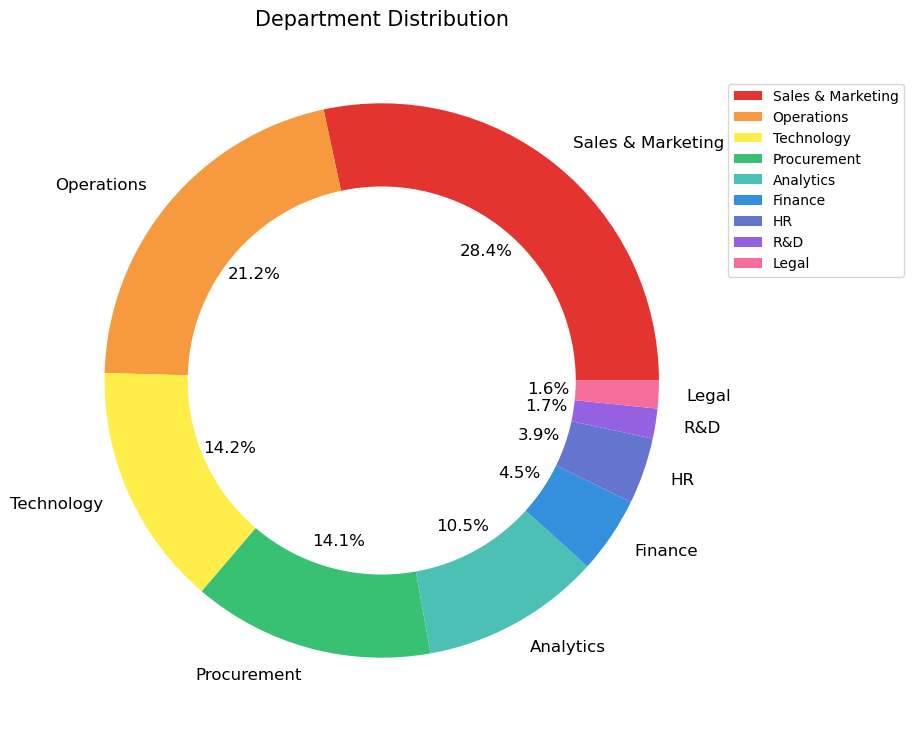

In [18]:
# Create a figure and subplot
fig , donutChartDepartment = plt.subplots(figsize=(16,9))


# Define x-axis and y-axis data values
distributionDepartment = df_hr_new.groupby('department')['is_promoted'].count()
distributionDepartment.sort_values(ascending=False, inplace=True)
departmentIndex = distributionDepartment.index #labels

# Create Customzied Pie Chart
colors = ['#e3342f','#f6993f','#ffed4a','#38c172','#4dc0b5','#3490dc','#6574cd','#9561e2','#f66d9b']
donutChartDepartment.pie(distributionDepartment, labels=departmentIndex, autopct='%1.1f%%'
        ,colors=colors,textprops={'fontsize': 12})

#Donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

donutChartDepartment.set_title("Department Distribution",fontsize = 15)

#Creating a legend
plt.legend(loc=(1,0.65),fontsize = 10)

# Display pie chart
plt.show()

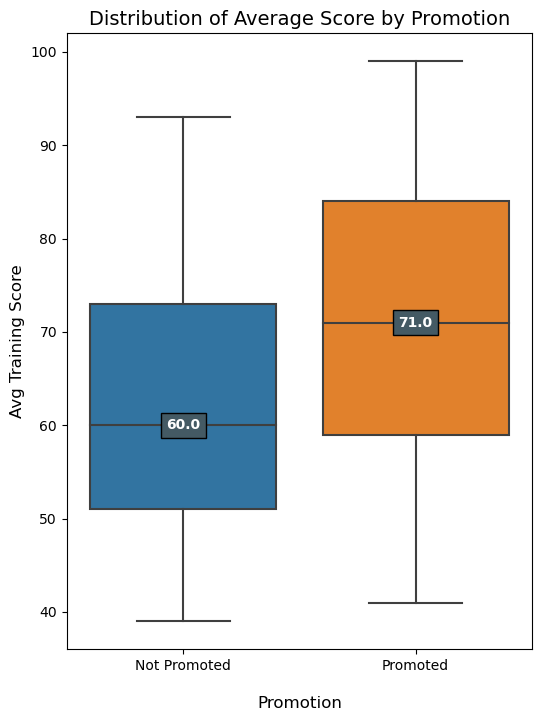

In [19]:
# Create a figure and subplot
fig , boxPlotAvgTrainScore = plt.subplots(figsize=(6,8))

# not promoted avg_training_score vs. promoted avg_training_score
boxPlotAvgTrainScore = sns.boxplot(y='avg_training_score', x='is_promoted', data=df_hr_new)

# Customise the plot
x_labels = ['Not Promoted','Promoted']
boxPlotAvgTrainScore.set_xticklabels(x_labels,size=10)
boxPlotAvgTrainScore.set_title('Distribution of Average Score by Promotion', fontsize = 14)
boxPlotAvgTrainScore.set_ylabel('Avg Training Score', fontsize = 12)
boxPlotAvgTrainScore.set_xlabel('\nPromotion', fontsize = 12)

ax = boxPlotAvgTrainScore.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(cat, y, f'{y}', ha='center', va='center', fontweight='bold', 
            size=10,color='white',bbox=dict(facecolor='#445A64'))\
    
# Display box plot
plt.show()

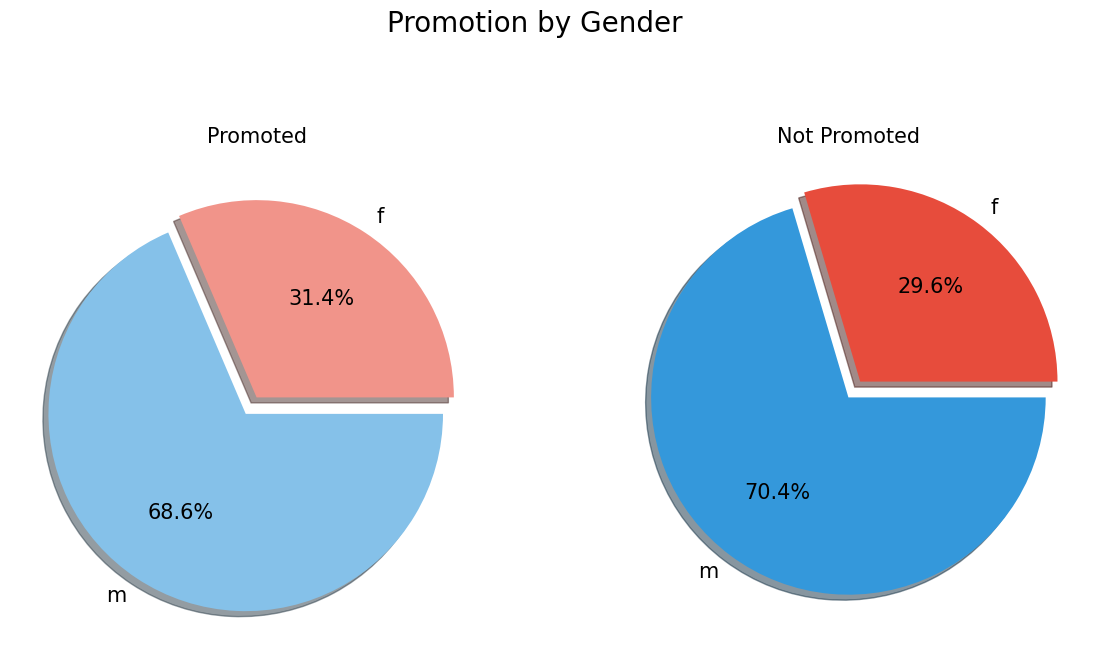

In [20]:
# Show percentage of gender that is promoted and not promoted.

# Promoted by Gender
promotionByGender1 = df_hr_new.groupby("gender")['is_promoted'].sum()
promotionByGenderLabel = promotionByGender1.index

# Not Promoted By Gender
df_hr_new_GenderNotPromoted = df_hr_new[df_hr_new['is_promoted']==0]
promotionByGender0 = df_hr_new_GenderNotPromoted.groupby("gender")['is_promoted'].count()

# Create a figure and subplot
fig, (promoted,NotPromoted) = plt.subplots(1,2,figsize=(14,8))

# Create Customzied Pie Chart
color_map = ['#F1948A','#85C1E9'] #Pink, Blue representing gender
promoted.pie(promotionByGender1, labels=promotionByGenderLabel, autopct='%1.1f%%'
        ,colors=color_map,explode=(0,0.1),textprops={'fontsize': 15},shadow=True)
promoted.set_title("Promoted",fontsize=15) #Title for promoted chart


# Create Customzied Pie Chart
color_map = ['#E74C3C','#3498DB'] #Darker color then before to differentiate
NotPromoted.pie(promotionByGender0, labels=promotionByGenderLabel, autopct='%1.1f%%'
        ,colors=color_map,explode=(0.1,0),textprops={'fontsize': 15},shadow=True)
NotPromoted.set_title("Not Promoted",fontsize=15) #Title for not promoted chart

# Main title for figure.
fig.suptitle("Promotion by Gender",fontsize=20)

plt.show()

In [21]:
df_hr_new

employee_id         department     region         education gender  \
11           49017  Sales & Marketing   region_7        Bachelor's      f   
39           58304  Sales & Marketing  region_28        Bachelor's      m   
60           17673  Sales & Marketing   region_4  Master's & above      m   
66           77981            Finance  region_22        Bachelor's      m   
67           16502  Sales & Marketing  region_22        Bachelor's      m   
...            ...                ...        ...               ...    ...   
50114         6829  Sales & Marketing  region_14        Bachelor's      m   
54629         9682         Operations  region_23        Bachelor's      f   
48627        53050          Analytics   region_4        Bachelor's      m   
30609        39630  Sales & Marketing  region_12        Bachelor's      m   
50304        74760         Operations  region_22        Bachelor's      f   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
11               sourcing                1   35                   5.0   
39               sourcing                1   33                   5.0   
60                  other                1   50                   4.0   
66                  other                1   27                   NaN   
67               sourcing                1   27                   NaN   
...                   ...              ...  ...                   ...   
50114               other                1   41                   4.0   
54629            sourcing                1   30                   NaN   
48627               other                2   27                   3.0   
30609               other                1   33                   3.0   
50304            referred                2   35                   4.0   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
11                     3              1            0                  50   
39                     6              1            0                  51   
60                    17              1            0                  47   
66                     1              1            1                  58   
67                     1              0            0                  61   
...                  ...            ...          ...                 ...   
50114                  6              0            0                  52   
54629                  1              1            0                  61   
48627                  1              0            0                  82   
30609                  7              1            0                  48   
50304                  9              0            0                  60   

       is_promoted  
11               1  
39               1  
60               1  
66               1  
67               1  
...            ...  
50114            0  
54629            0  
48627            0  
30609            0  
50304            0  

[9336 rows x 14 columns]

### 1.2. Cleanse and Transform the data <a id="1.2."></a>
[Back to Top](#top)

### 1.2.1. Outliers <a id="1.2.1."></a>
[Back to Top](#top)

In [22]:
# find numerical variables
num_cols = [n for n in df_hr_new.columns if df_hr_new[n].dtypes !='O']
df_hr_new[num_cols].isnull().mean()
# In this case, we can see that not all numerical columns are worth finding outliers, such as employee_id
# Some columns that are worth finding outliers are no_of_trainings, age, previous_year_rating,
# length_of_service and avg_training_score

employee_id             0.0000
no_of_trainings         0.0000
age                     0.0000
previous_year_rating    0.0738
length_of_service       0.0000
KPIs_met >80%           0.0000
awards_won?             0.0000
avg_training_score      0.0000
is_promoted             0.0000
dtype: float64

In [23]:
# Finding outliersestimate 1.5 times of Interquartile Range (IQR) to calculate the boundaries
def find_boundaries(df, variable):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #Finding the IQR using .quantile(.75 and .25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5) #Formula 
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [24]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel("\n" + variable + " quantities")

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [25]:
# new dataframe defined to compare before and after results of outlier treatment
df_hr_newBeforeOutlier = df_hr_new.copy()

<b> No. of Trainings </b>

In [26]:
df_hr_new['no_of_trainings'].value_counts()

1    7681
2    1288
3     267
4      76
5      15
6       9
Name: no_of_trainings, dtype: int64

In [27]:
upper_boundary, lower_boundary = find_boundaries(df_hr_new, 'no_of_trainings')
outliers_NumTrainings = np.where(df_hr_new['no_of_trainings'] > upper_boundary, True,
                    np.where(df_hr_new['no_of_trainings'] < lower_boundary, True, False))
outliers_NumTrainings.sum() 

1655

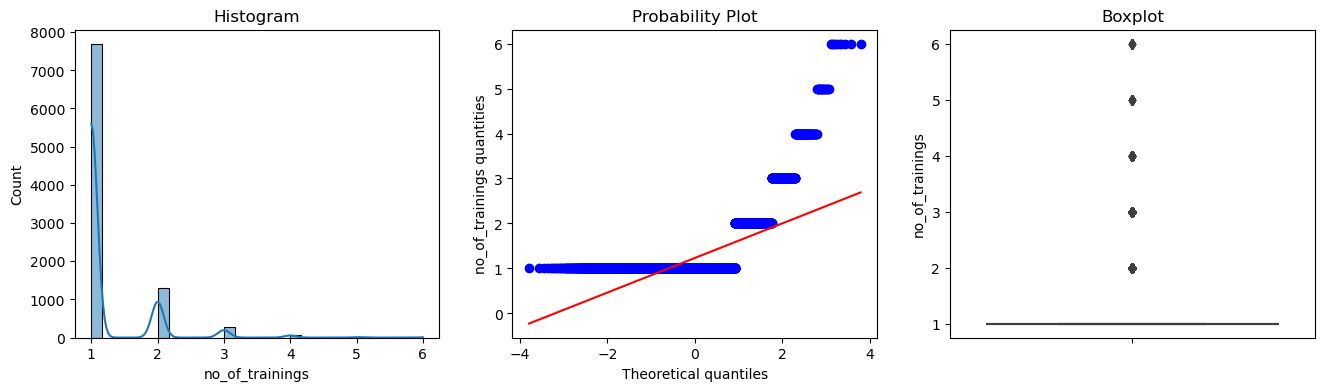

In [28]:
diagnostic_plots(df_hr_new, 'no_of_trainings')

In [29]:
df_hr_new['no_of_trainings'].value_counts()

1    7681
2    1288
3     267
4      76
5      15
6       9
Name: no_of_trainings, dtype: int64

<b> Age (Winsorizer, 1.5 IQR Right)</b>

In [30]:
upper_boundary, lower_boundary = find_boundaries(df_hr_new, 'age')
outliers_Age = np.where(df_hr_new['age'] > upper_boundary, True,
                    np.where(df_hr_new['age'] < lower_boundary, True, False))
outliers_Age.sum() 

365

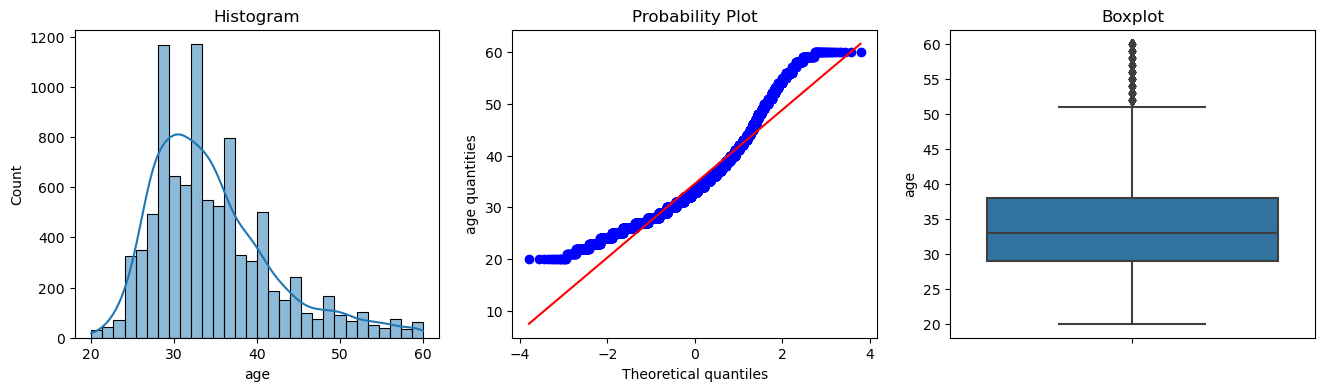

In [31]:
# Before 
diagnostic_plots(df_hr_new, 'age')

In [32]:
# Create a capper
winsorizer = Winsorizer(capping_method = 'iqr',
                       tail='right',#cap,left,right or both tails
                       fold=1.5,
                       variables='age')
winsorizer.fit(df_hr_new)
df_hr_new = winsorizer.transform(df_hr_new)

In [33]:
winsorizer.right_tail_caps_

{'age': 51.5}

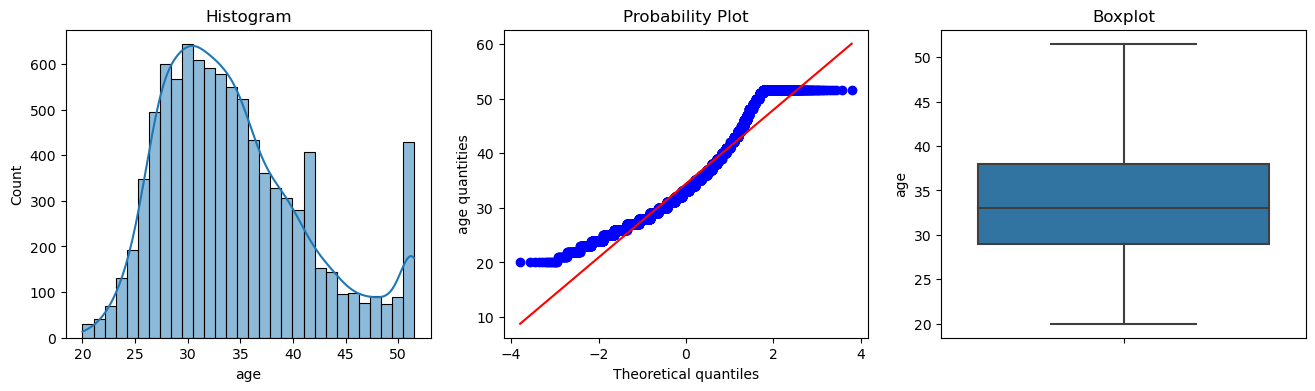

In [34]:
# After 
diagnostic_plots(df_hr_new, 'age')

<b> Previous Year Rating </b>

In [35]:
upper_boundary, lower_boundary = find_boundaries(df_hr_new, 'previous_year_rating')
outliers_PastYearRating = np.where(df_hr_new['previous_year_rating'] > upper_boundary, True,
                    np.where(df_hr_new['previous_year_rating'] < lower_boundary, True, False))
outliers_PastYearRating.sum() 

0

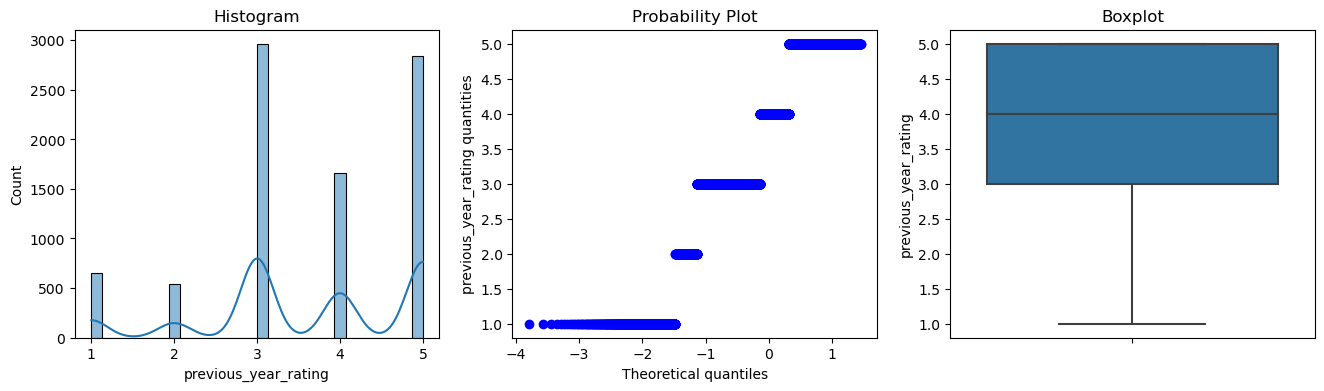

In [36]:
diagnostic_plots(df_hr_new, 'previous_year_rating')

<b> Length of Service </b>

In [37]:
upper_boundary, lower_boundary = find_boundaries(df_hr_new, 'length_of_service')
outliers_LengthOfService = np.where(df_hr_new['length_of_service'] > upper_boundary, True,
                    np.where(df_hr_new['length_of_service'] < lower_boundary, True, False))
outliers_LengthOfService.sum()

511

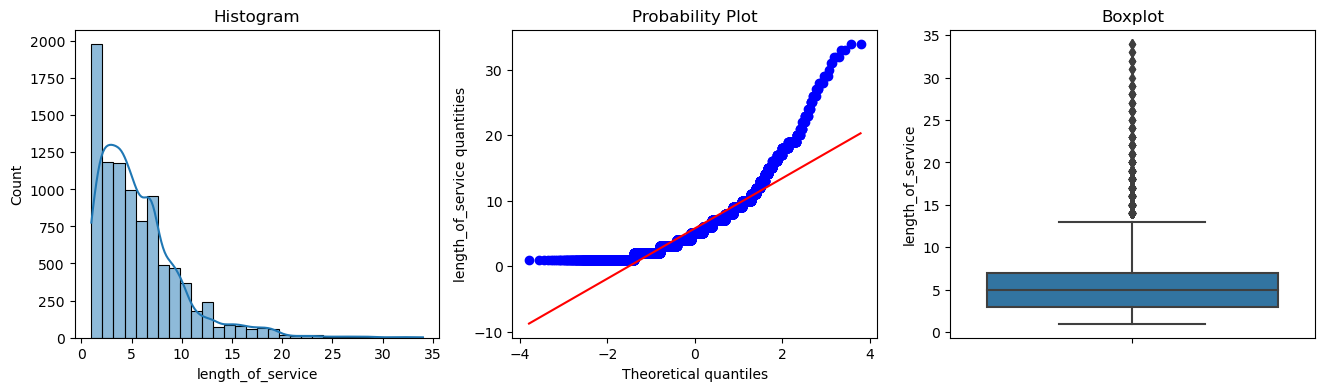

In [38]:
# Before
diagnostic_plots(df_hr_new, 'length_of_service')

In [39]:
# Create a capper
winsorizer = Winsorizer(capping_method = 'quantiles',
                       tail='right',#cap,left,right or both tails
                       fold=0.05,
                       variables='length_of_service')
winsorizer.fit(df_hr_new)
df_hr_new = winsorizer.transform(df_hr_new)

In [40]:
winsorizer.right_tail_caps_

{'length_of_service': 14.0}

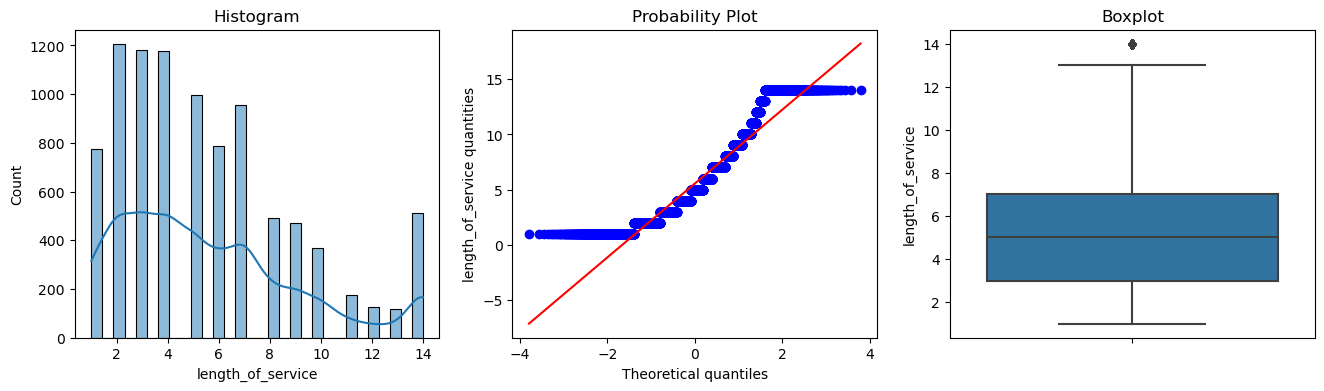

In [41]:
# After
diagnostic_plots(df_hr_new, 'length_of_service')

<b> Average Training Score </b>

In [42]:
upper_boundary, lower_boundary = find_boundaries(df_hr_new, 'avg_training_score')
outliers_AvgTrainScore = np.where(df_hr_new['avg_training_score'] > upper_boundary, True,
                    np.where(df_hr_new['avg_training_score'] < lower_boundary, True, False))
outliers_AvgTrainScore.sum()

0

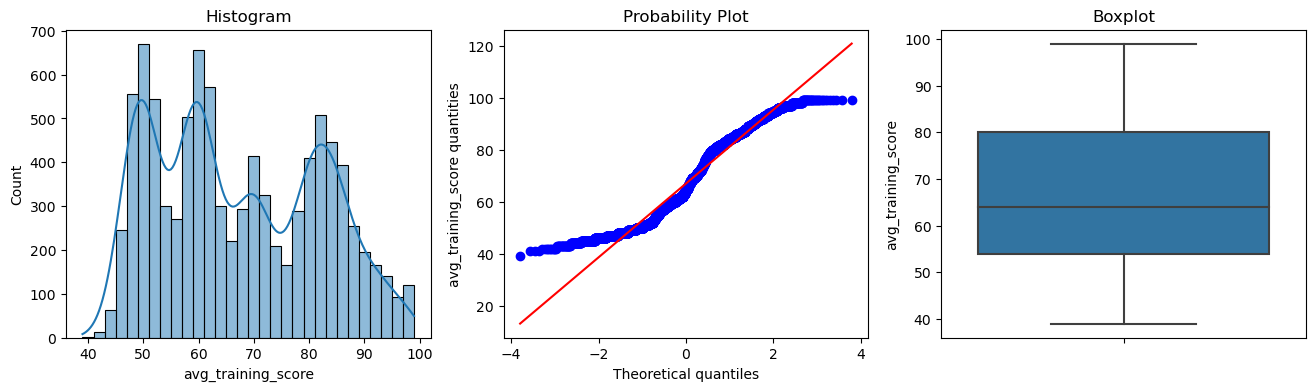

In [43]:
diagnostic_plots(df_hr_new, 'avg_training_score')

### 1.2.2. Missing Value Imputation <a id="1.2.2."></a>
[Back to Top](#top)

In [44]:
# find the percentage of missing data per variable 
df_hr_new.isnull().mean()

employee_id             0.00000
department              0.00000
region                  0.00000
education               0.03674
gender                  0.00000
recruitment_channel     0.00000
no_of_trainings         0.00000
age                     0.00000
previous_year_rating    0.07380
length_of_service       0.00000
KPIs_met >80%           0.00000
awards_won?             0.00000
avg_training_score      0.00000
is_promoted             0.00000
dtype: float64

In [45]:
# first we need to make a list of columns that has missing data
features_num_mean = ['previous_year_rating'] 
features_cat_frequent = ["education"]

In [46]:
# we instantiate each imputer within a pipeline

pipe = Pipeline(steps=[
    ('imp_num_mean', mdi.MeanMedianImputer(imputation_method = 'median', variables=features_num_mean)),
    ('imp_cat_frequent', mdi.CategoricalImputer(variables = features_cat_frequent, imputation_method='frequent'))
])

In [47]:
# now we fit the preprocessor
pipe.fit(df_hr_new)

Pipeline(steps=[('imp_num_mean',
                 MeanMedianImputer(variables=['previous_year_rating'])),
                ('imp_cat_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['education']))])

In [48]:
# and now we impute the data
df_hr_new = pipe.transform(df_hr_new)

In [49]:
df_hr_new.isnull().mean()

employee_id             0.0
department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

### 1.2.3. Categorical Data Transformation<a id="1.2.3."></a>
[Back to Top](#top)

In [50]:
def find_unique_values(df):
    for variable in df:
        if (df[variable].dtypes == "O"):
            print(variable,":   ",df[variable].unique(),"\t",df[variable].nunique())

In [51]:
find_unique_values(df_hr_new)

department :    ['Sales & Marketing' 'Finance' 'Analytics' 'Technology' 'Legal'
 'Operations' 'Procurement' 'R&D' 'HR'] 	 9
region :    ['region_7' 'region_28' 'region_4' 'region_22' 'region_31' 'region_2'
 'region_11' 'region_15' 'region_13' 'region_23' 'region_25' 'region_34'
 'region_5' 'region_17' 'region_20' 'region_12' 'region_26' 'region_1'
 'region_14' 'region_29' 'region_32' 'region_3' 'region_16' 'region_6'
 'region_27' 'region_21' 'region_8' 'region_19' 'region_10' 'region_33'
 'region_30' 'region_24' 'region_18' 'region_9'] 	 34
education :    ["Bachelor's" "Master's & above" 'Below Secondary'] 	 3
gender :    ['f' 'm'] 	 2
recruitment_channel :    ['sourcing' 'other' 'referred'] 	 3


<b> Ordinal Encoding </b>

In [52]:
ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['gender'])

In [53]:
# let's fit the encoder to the train set
ordinal_enc.fit(df_hr_new)

OrdinalEncoder(encoding_method='arbitrary', variables=['gender'])

In [54]:
# in the encoder dict we can observe the numbers
# assigned to each category for all the indicated variables

ordinal_enc.encoder_dict_

{'gender': {'f': 0, 'm': 1}}

In [55]:
# transform encoding to dataset
df_hr_new = ordinal_enc.transform(df_hr_new)

<b> One-Hot Encoding on Top 5 Categories </b>

In [56]:
ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=5,  
    
    # we can select which variables to encode
    variables=['region'],
    
    # to indicate if we drop one of the binaries
    drop_last=False)

# let's fit the encoder to the dataset set
ohe_enc.fit(df_hr_new)

OneHotEncoder(top_categories=5, variables=['region'])

In [57]:
# transform encoding to dataset
df_hr_new = ohe_enc.transform(df_hr_new)

<b> One-Hot Encoding </b>

In [58]:
ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=None,  
    
    # we can select which variables to encode
    variables=['department','recruitment_channel','education'],
    
    # to indicate if we drop one of the binaries
    drop_last=False)

# let's fit the encoder to the dataset set
ohe_enc.fit(df_hr_new)

OneHotEncoder(variables=['department', 'recruitment_channel', 'education'])

In [59]:
# transform encoding to dataset
df_hr_new = ohe_enc.transform(df_hr_new)

In [60]:
df_hr_new.head()

employee_id  gender  no_of_trainings   age  previous_year_rating  \
11        49017       0                1  35.0                   5.0   
39        58304       1                1  33.0                   5.0   
60        17673       1                1  50.0                   4.0   
66        77981       1                1  27.0                   4.0   
67        16502       1                1  27.0                   4.0   

    length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
11                3.0              1            0                  50   
39                6.0              1            0                  51   
60               14.0              1            0                  47   
66                1.0              1            1                  58   
67                1.0              0            0                  61   

    is_promoted  ...  department_Operations  department_Procurement  \
11            1  ...                      0                       0   
39            1  ...                      0                       0   
60            1  ...                      0                       0   
66            1  ...                      0                       0   
67            1  ...                      0                       0   

    department_R&D  department_HR  recruitment_channel_sourcing  \
11               0              0                             1   
39               0              0                             1   
60               0              0                             0   
66               0              0                             0   
67               0              0                             1   

    recruitment_channel_other  recruitment_channel_referred  \
11                          0                             0   
39                          0                             0   
60                          1                             0   
66                          1                             0   
67                          0                             0   

    education_Bachelor's  education_Master's & above  \
11                     1                           0   
39                     1                           0   
60                     0                           1   
66                     1                           0   
67                     1                           0   

    education_Below Secondary  
11                          0  
39                          0  
60                          0  
66                          0  
67                          0  

[5 rows x 30 columns]

In [61]:
df_hr_new.columns, len(df_hr_new.columns)

(Index(['employee_id', 'gender', 'no_of_trainings', 'age',
        'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
        'awards_won?', 'avg_training_score', 'is_promoted', 'region_region_2',
        'region_region_22', 'region_region_7', 'region_region_15',
        'region_region_13', 'department_Sales & Marketing',
        'department_Finance', 'department_Analytics', 'department_Technology',
        'department_Legal', 'department_Operations', 'department_Procurement',
        'department_R&D', 'department_HR', 'recruitment_channel_sourcing',
        'recruitment_channel_other', 'recruitment_channel_referred',
        'education_Bachelor's', 'education_Master's & above',
        'education_Below Secondary'],
       dtype='object'),
 30)

### 1.2.4. Numerical Transformation <a id="1.2.4."></a>
[Back to Top](#top)

In [62]:
df_hr_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 50304
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   9336 non-null   int64  
 1   gender                        9336 non-null   int64  
 2   no_of_trainings               9336 non-null   int64  
 3   age                           9336 non-null   float64
 4   previous_year_rating          9336 non-null   float64
 5   length_of_service             9336 non-null   float64
 6   KPIs_met >80%                 9336 non-null   int64  
 7   awards_won?                   9336 non-null   int64  
 8   avg_training_score            9336 non-null   int64  
 9   is_promoted                   9336 non-null   int64  
 10  region_region_2               9336 non-null   int32  
 11  region_region_22              9336 non-null   int32  
 12  region_region_7               9336 non-null   int32  
 13  r

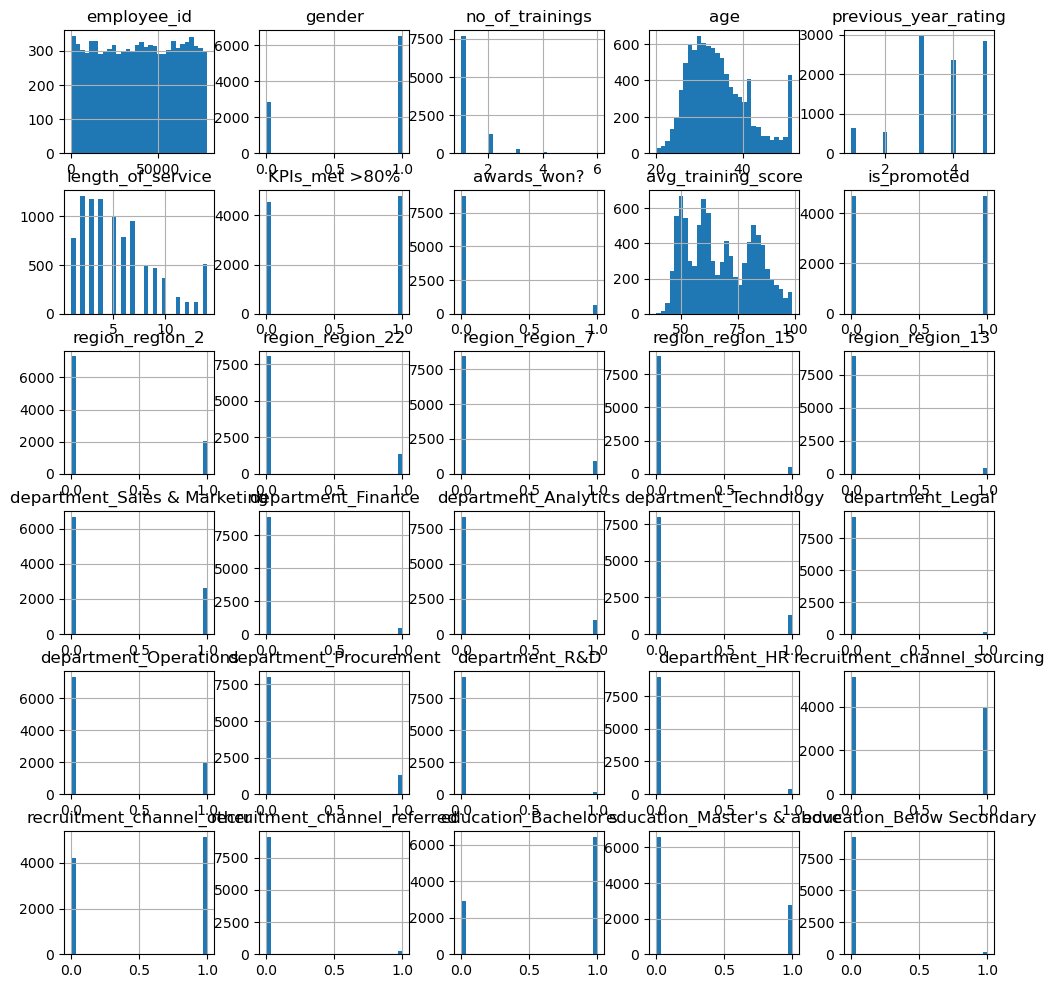

In [63]:
overviewOfNumCols = df_hr_new.hist(bins=30, figsize=(12,12))
plt.show()

In [64]:
# Make a copy of df before transformation for comparison
df_hr_new_beforeTrans = df_hr_new.copy()

<b> Employee ID </b> 

<b> Box-Cox Transformation: </b>

\begin{equation}
X_t = 
\begin{cases}
  (X^{\lambda} -1) / {\lambda} & \text{if } \lambda \neq 0 \\    
  \log(X)  & \text{if } \lambda =0
\end{cases}
\end{equation}

where $X$ is the variable and λ is the transformation parameter. 

In [65]:
# initialize the transformer with a group of variables to transform
bct = BoxCoxTransformer(variables = ["employee_id"])

# fit transformer to the entire dataframe
bct.fit(df_hr_new)
df_hr_new = bct.transform(df_hr_new)

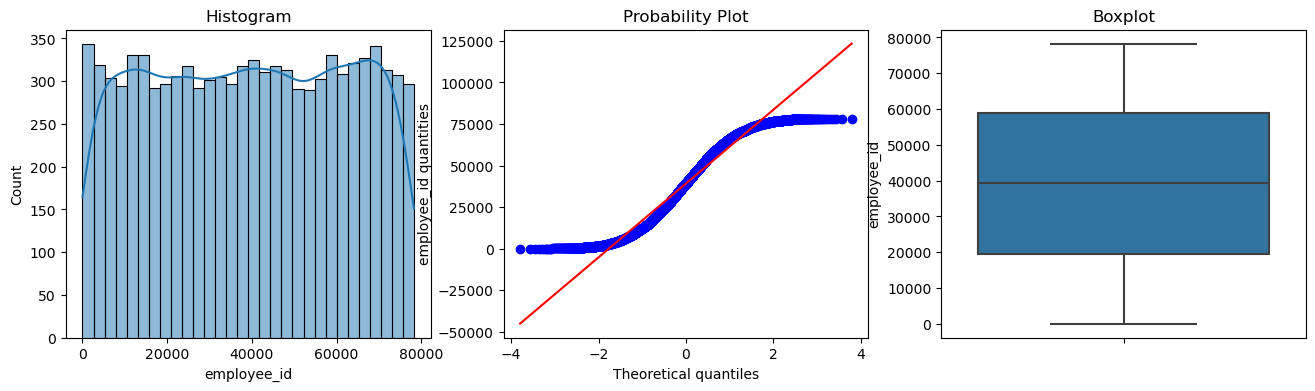

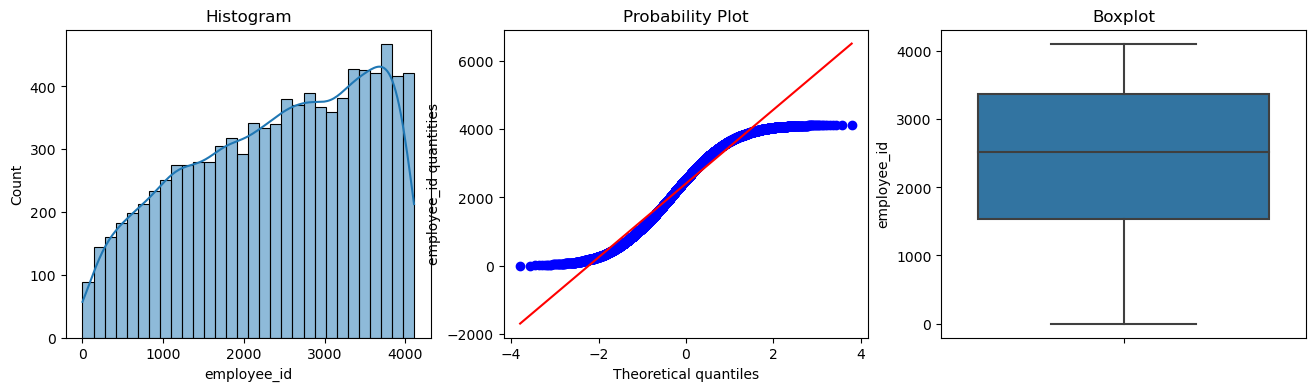

In [66]:
# Before Transforming 
diagnostic_plots(df_hr_new_beforeTrans, 'employee_id')
# After Transforming 
diagnostic_plots(df_hr_new, 'employee_id')

<b> Age </b> 

<b> Cube Root Transformation: </b> 

\begin{equation}
X_t = X^{1/3} \text{ (cube root)}
\end{equation}

In [67]:
# set up PowerTransformer with the cube root exponent
et = PowerTransformer(variables = ["age"], exp=1/3) # for cube root

# fit transformer to data 
et.fit(df_hr_new)
df_hr_new = et.transform(df_hr_new)

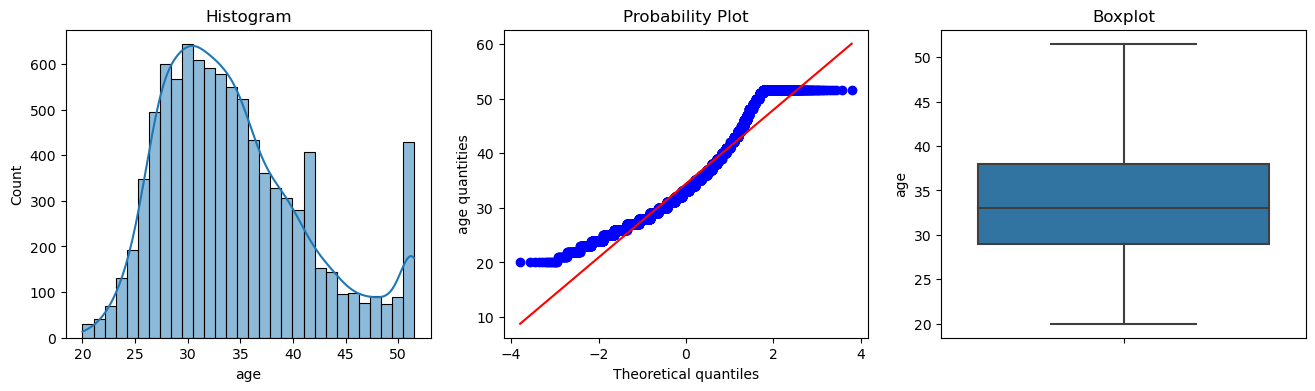

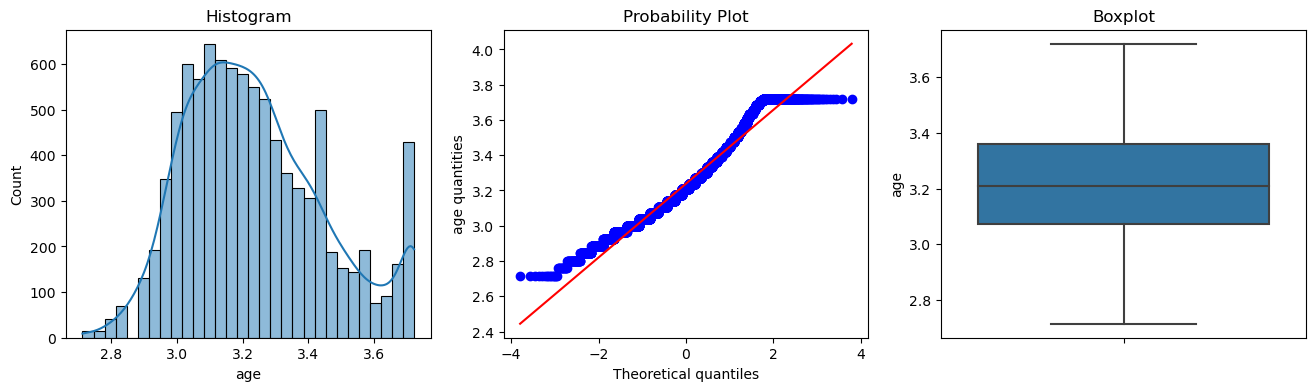

In [68]:
# Before Transforming 
diagnostic_plots(df_hr_new_beforeTrans, 'age')
# After Transforming 
diagnostic_plots(df_hr_new, 'age')

<b> Average Training Score </b> 

<b> Square Root Transformation: </b> 

\begin{equation}
X_t = X^{1/2} \text{ (square root)}
\end{equation}

In [69]:
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ["avg_training_score"], exp=1/2) # for sq root

# fit transformer to the entire dataframe
et.fit(df_hr_new)
df_hr_new = et.transform(df_hr_new)

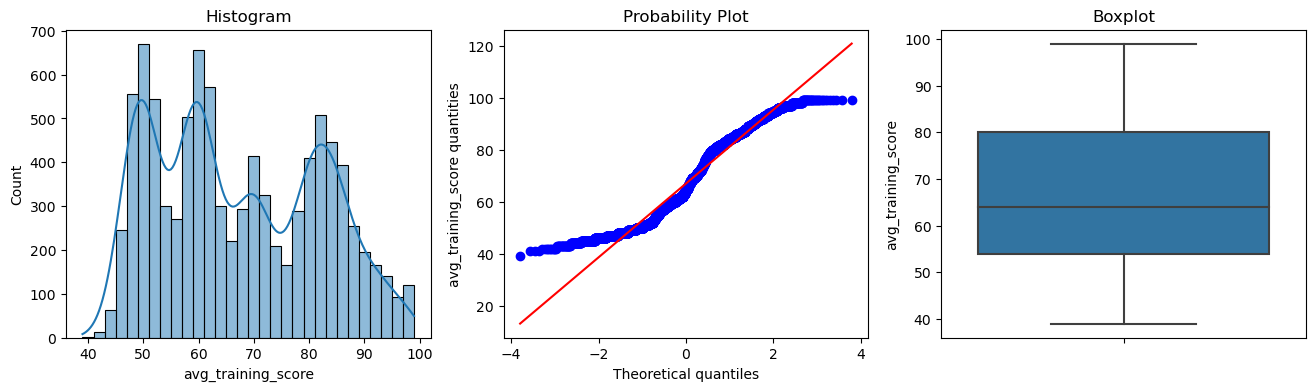

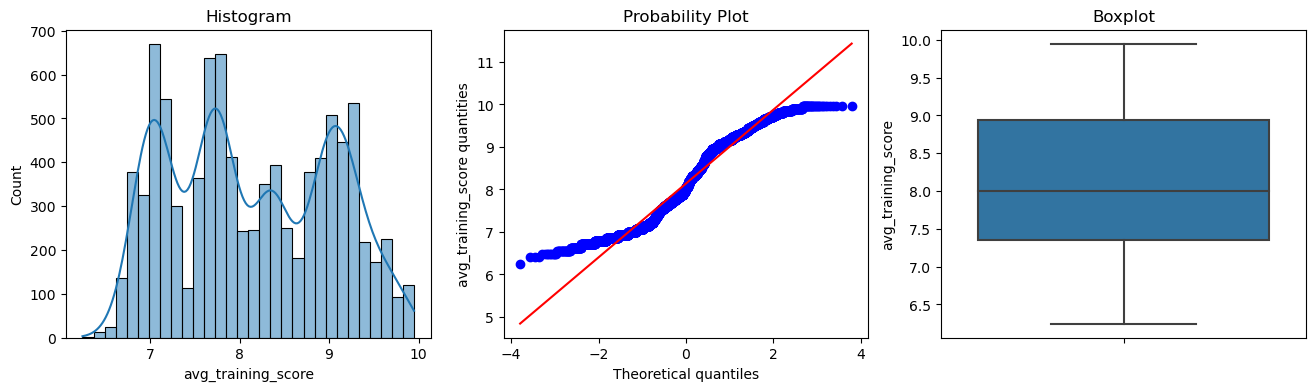

In [70]:
# Before Transforming 
diagnostic_plots(df_hr_new_beforeTrans, 'avg_training_score')
# After Transforming 
diagnostic_plots(df_hr_new, 'avg_training_score')

### 1.2.5. Numerical Data (Discretization) <a id="1.2.5."></a>
[Back to Top](#top)

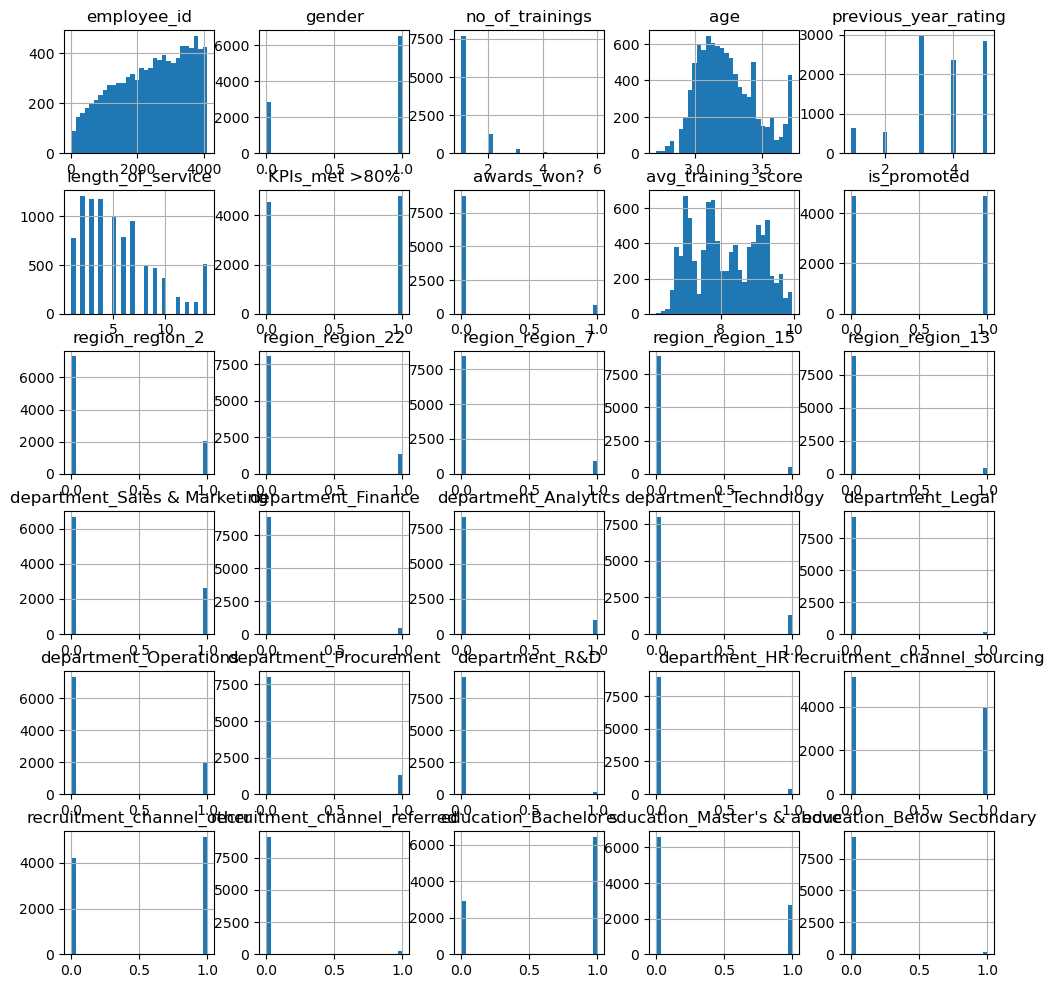

In [71]:
overviewOfNumCols = df_hr_new.hist(bins=30, figsize=(12,12))
plt.show()

In [72]:
# with feature engine we can automate the process for many variables
# in one line of code

EWdisc = EqualWidthDiscretiser(bins=10, variables = ['employee_id', 'age', 'length_of_service','avg_training_score'])

EWdisc.fit(df_hr_new)

EqualWidthDiscretiser(variables=['employee_id', 'age', 'length_of_service',
                                 'avg_training_score'])

In [73]:
EWdisc.binner_dict_

{'employee_id': [-inf,
  411.6968029415432,
  822.4988442121424,
  1233.3008854827417,
  1644.102926753341,
  2054.9049680239405,
  2465.7070092945396,
  2876.509050565139,
  3287.3110918357384,
  3698.1131331063375,
  inf],
 'age': [-inf,
  2.815026797972261,
  2.9156359793496156,
  3.01624516072697,
  3.116854342104325,
  3.2174635234816797,
  3.318072704859034,
  3.4186818862363886,
  3.5192910676137434,
  3.6199002489910983,
  inf],
 'length_of_service': [-inf,
  2.3,
  3.6,
  4.9,
  6.2,
  7.5,
  8.8,
  10.1,
  11.4,
  12.700000000000001,
  inf],
 'avg_training_score': [-inf,
  6.615485635665179,
  6.985973272931958,
  7.356460910198739,
  7.726948547465518,
  8.097436184732299,
  8.46792382199908,
  8.83841145926586,
  9.20889909653264,
  9.579386733799419,
  inf]}

In [74]:
# transform to dataset
df_hr_new = EWdisc.transform(df_hr_new)

<b> Employee ID </b>

Text(0, 0.5, 'Number of observations per bin')

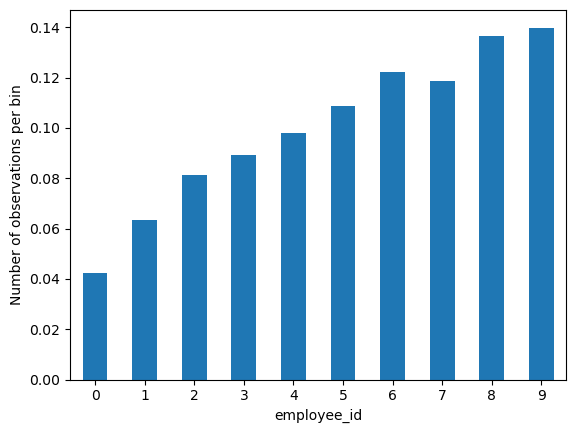

In [75]:
# employee_id

t1 = df_hr_new.groupby(['employee_id'])['employee_id'].count() / len(df_hr_new)

tmp = t1
tmp.columns = ['employee_id']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

<b> Age </b>

Text(0, 0.5, 'Number of observations per bin')

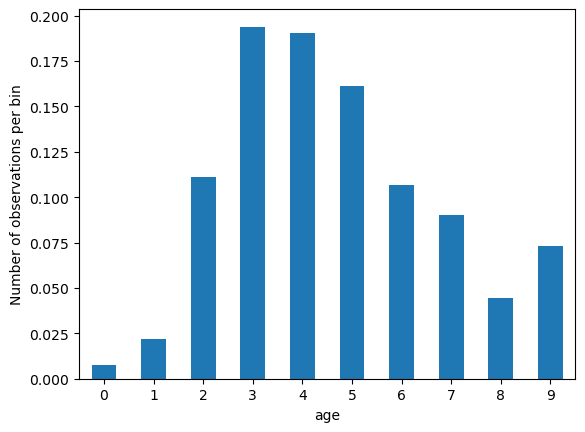

In [76]:
# age

t1 = df_hr_new.groupby(['age'])['age'].count() / len(df_hr_new)

tmp = t1
tmp.columns = ['age']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

<b> Average Training Score </b>

Text(0, 0.5, 'Number of observations per bin')

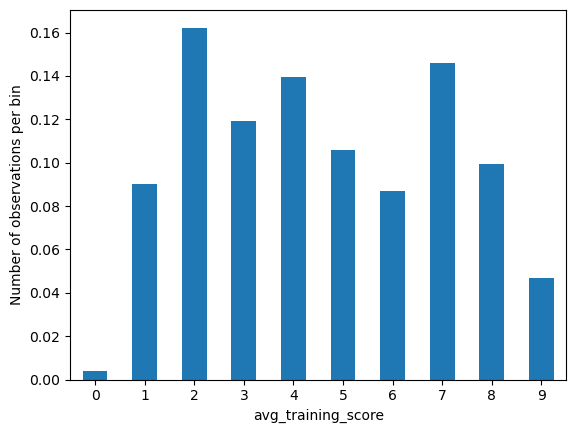

In [77]:
# avg_training_score

t1 = df_hr_new.groupby(['avg_training_score'])['avg_training_score'].count() / len(df_hr_new)

tmp = t1
tmp.columns = ['avg_training_score']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

<b> Length of Service </b>

Text(0, 0.5, 'Number of observations per bin')

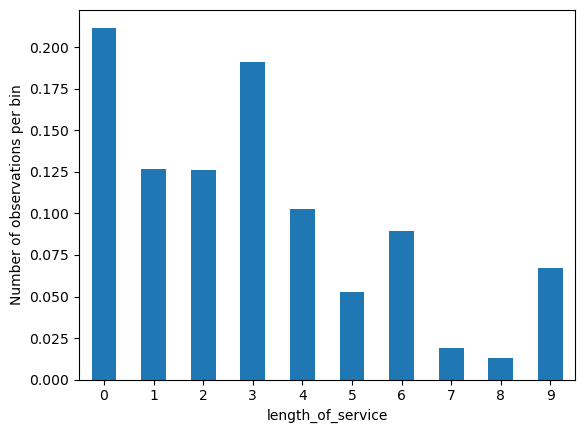

In [78]:
# length_of_service

t1 = df_hr_new.groupby(['length_of_service'])['length_of_service'].count() / len(df_hr_new)

tmp = t1
tmp.columns = ['length_of_service']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

### 1.2.6. Feature Scaling <a id="1.2.6."></a>
[Back to Top](#top)

In [79]:
# Dataset after binning
df_hr_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 50304
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   9336 non-null   int64  
 1   gender                        9336 non-null   int64  
 2   no_of_trainings               9336 non-null   int64  
 3   age                           9336 non-null   int64  
 4   previous_year_rating          9336 non-null   float64
 5   length_of_service             9336 non-null   int64  
 6   KPIs_met >80%                 9336 non-null   int64  
 7   awards_won?                   9336 non-null   int64  
 8   avg_training_score            9336 non-null   int64  
 9   is_promoted                   9336 non-null   int64  
 10  region_region_2               9336 non-null   int32  
 11  region_region_22              9336 non-null   int32  
 12  region_region_7               9336 non-null   int32  
 13  r

In [80]:
df_hr_new.head()

employee_id  gender  no_of_trainings  age  previous_year_rating  \
11            7       0                1    5                   5.0   
39            8       1                1    4                   5.0   
60            3       1                1    9                   4.0   
66            9       1                1    2                   4.0   
67            3       1                1    2                   4.0   

    length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
11                  1              1            0                   2   
39                  3              1            0                   2   
60                  9              1            0                   1   
66                  0              1            1                   3   
67                  0              0            0                   4   

    is_promoted  ...  department_Operations  department_Procurement  \
11            1  ...                      0                       0   
39            1  ...                      0                       0   
60            1  ...                      0                       0   
66            1  ...                      0                       0   
67            1  ...                      0                       0   

    department_R&D  department_HR  recruitment_channel_sourcing  \
11               0              0                             1   
39               0              0                             1   
60               0              0                             0   
66               0              0                             0   
67               0              0                             1   

    recruitment_channel_other  recruitment_channel_referred  \
11                          0                             0   
39                          0                             0   
60                          1                             0   
66                          1                             0   
67                          0                             0   

    education_Bachelor's  education_Master's & above  \
11                     1                           0   
39                     1                           0   
60                     0                           1   
66                     1                           0   
67                     1                           0   

    education_Below Secondary  
11                          0  
39                          0  
60                          0  
66                          0  
67                          0  

[5 rows x 30 columns]

In [81]:
# set up the scaler
scaler = StandardScaler()

colsToScale = ['employee_id','no_of_trainings','age','previous_year_rating',
               'length_of_service','avg_training_score']
# Fitting then transformation 
df_hr_new[colsToScale] = scaler.fit_transform(df_hr_new[colsToScale])

In [82]:
df_hr_new

employee_id  gender  no_of_trainings       age  previous_year_rating  \
11        0.617199       0        -0.406686  0.153499              1.145246   
39        0.989794       1        -0.406686 -0.321341              1.145246   
60       -0.873178       1        -0.406686  2.052856              0.289063   
66        1.362388       1        -0.406686 -1.271019              0.289063   
67       -0.873178       1        -0.406686 -1.271019              0.289063   
...            ...     ...              ...       ...                   ...   
50114    -1.618367       1        -0.406686  1.103178              0.289063   
54629    -1.245773       0        -0.406686 -0.796180              0.289063   
48627     0.617199       1         1.355179 -1.271019             -0.567121   
30609     0.244605       1        -0.406686 -0.321341             -0.567121   
50304     1.362388       0         1.355179  0.153499              0.289063   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
11             -0.774513              1            0           -1.088511   
39             -0.002563              1            0           -1.088511   
60              2.313285              1            0           -1.504251   
66             -1.160488              1            1           -0.672771   
67             -1.160488              0            0           -0.257032   
...                  ...            ...          ...                 ...   
50114          -0.002563              0            0           -1.088511   
54629          -1.160488              1            0           -0.257032   
48627          -1.160488              0            0            0.990187   
30609           0.383412              1            0           -1.504251   
50304           1.155361              0            0           -0.257032   

       is_promoted  ...  department_Operations  department_Procurement  \
11               1  ...                      0                       0   
39               1  ...                      0                       0   
60               1  ...                      0                       0   
66               1  ...                      0                       0   
67               1  ...                      0                       0   
...            ...  ...                    ...                     ...   
50114            0  ...                      0                       0   
54629            0  ...                      1                       0   
48627            0  ...                      0                       0   
30609            0  ...                      0                       0   
50304            0  ...                      1                       0   

       department_R&D  department_HR  recruitment_channel_sourcing  \
11                  0              0                             1   
39                  0              0                             1   
60                  0              0                             0   
66                  0              0                             0   
67                  0              0                             1   
...               ...            ...                           ...   
50114               0              0                             0   
54629               0              0                             1   
48627               0              0                             0   
30609               0              0                             0   
50304               0              0                             0   

       recruitment_channel_other  recruitment_channel_referred  \
11                             0                             0   
39                             0                             0   
60                             1                             0   
66                             1                             0   
67                             0                             0   
...                

In [83]:
df_hr_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 11 to 50304
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   9336 non-null   float64
 1   gender                        9336 non-null   int64  
 2   no_of_trainings               9336 non-null   float64
 3   age                           9336 non-null   float64
 4   previous_year_rating          9336 non-null   float64
 5   length_of_service             9336 non-null   float64
 6   KPIs_met >80%                 9336 non-null   int64  
 7   awards_won?                   9336 non-null   int64  
 8   avg_training_score            9336 non-null   float64
 9   is_promoted                   9336 non-null   int64  
 10  region_region_2               9336 non-null   int32  
 11  region_region_22              9336 non-null   int32  
 12  region_region_7               9336 non-null   int32  
 13  r

In [84]:
# Shifting target to last column
df_hr_new = df_hr_new.reindex(columns = [col for col in df_hr_new.columns if col != 'is_promoted'] + ['is_promoted'])
df_hr_new

employee_id  gender  no_of_trainings       age  previous_year_rating  \
11        0.617199       0        -0.406686  0.153499              1.145246   
39        0.989794       1        -0.406686 -0.321341              1.145246   
60       -0.873178       1        -0.406686  2.052856              0.289063   
66        1.362388       1        -0.406686 -1.271019              0.289063   
67       -0.873178       1        -0.406686 -1.271019              0.289063   
...            ...     ...              ...       ...                   ...   
50114    -1.618367       1        -0.406686  1.103178              0.289063   
54629    -1.245773       0        -0.406686 -0.796180              0.289063   
48627     0.617199       1         1.355179 -1.271019             -0.567121   
30609     0.244605       1        -0.406686 -0.321341             -0.567121   
50304     1.362388       0         1.355179  0.153499              0.289063   

       length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
11             -0.774513              1            0           -1.088511   
39             -0.002563              1            0           -1.088511   
60              2.313285              1            0           -1.504251   
66             -1.160488              1            1           -0.672771   
67             -1.160488              0            0           -0.257032   
...                  ...            ...          ...                 ...   
50114          -0.002563              0            0           -1.088511   
54629          -1.160488              1            0           -0.257032   
48627          -1.160488              0            0            0.990187   
30609           0.383412              1            0           -1.504251   
50304           1.155361              0            0           -0.257032   

       region_region_2  ...  department_Procurement  department_R&D  \
11                   0  ...                       0               0   
39                   0  ...                       0               0   
60                   0  ...                       0               0   
66                   0  ...                       0               0   
67                   0  ...                       0               0   
...                ...  ...                     ...             ...   
50114                0  ...                       0               0   
54629                0  ...                       0               0   
48627                0  ...                       0               0   
30609                0  ...                       0               0   
50304                0  ...                       0               0   

       department_HR  recruitment_channel_sourcing  recruitment_channel_other  \
11                 0                             1                          0   
39                 0                             1                          0   
60                 0                             0                          1   
66                 0                             0                          1   
67                 0                             1                          0   
...              ...                           ...                        ...   
50114              0                             0                          1   
54629              0                             1                          0   
48627              0                             0                          1   
30609              0                             0                          1   
50304              0                             0                          0   

       recruitment_channel_referred  education_Bachelor's  \
11                                0                     1   
39                                0                     1   
60                                0                     0   
66                                0                     1   
67            

### 1.3. Correlation Analysis <a id="1.3."></a>
[Back to Top](#top)

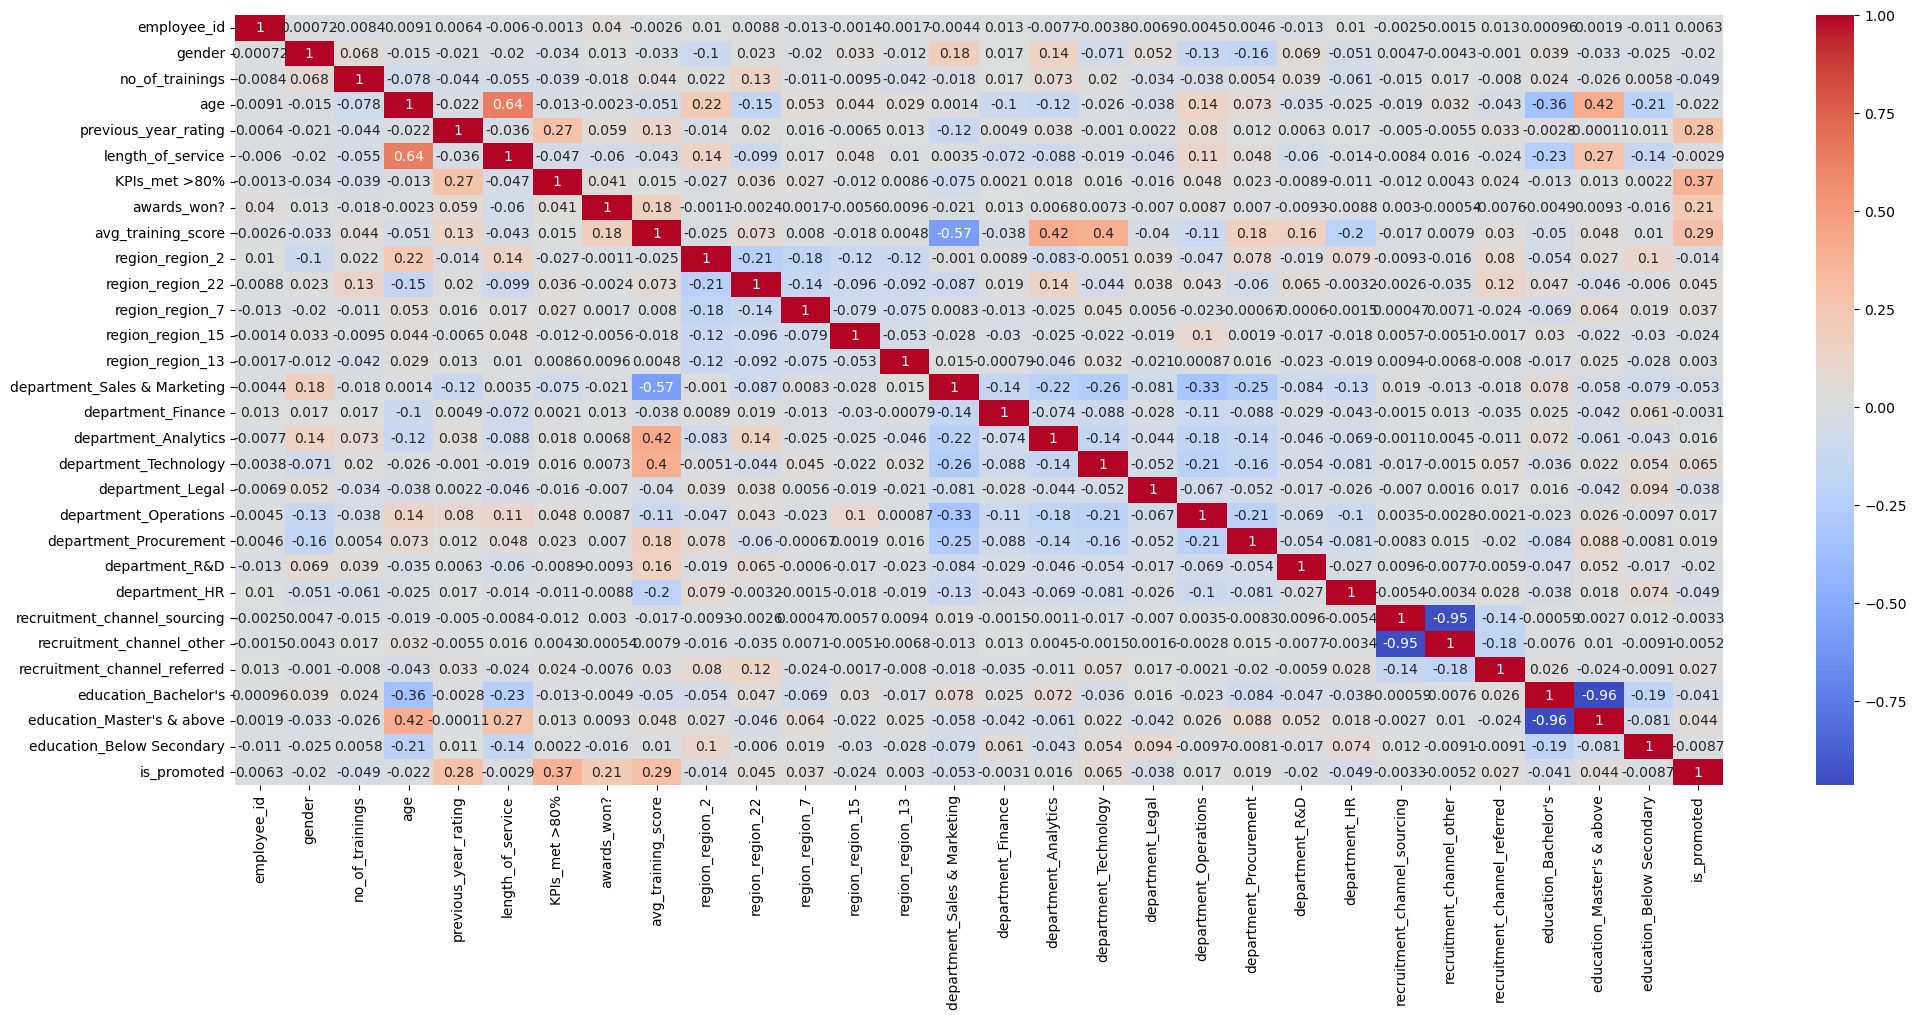

In [85]:
# Set figure size with matplotlib
plt.figure(figsize=(24,10))

# Calculate correlations of feature-pairs in df_stats
corr = df_hr_new.corr()

# Create heatmap
sns.heatmap(corr,cmap='coolwarm',annot=True)

# Display the plot
plt.show()

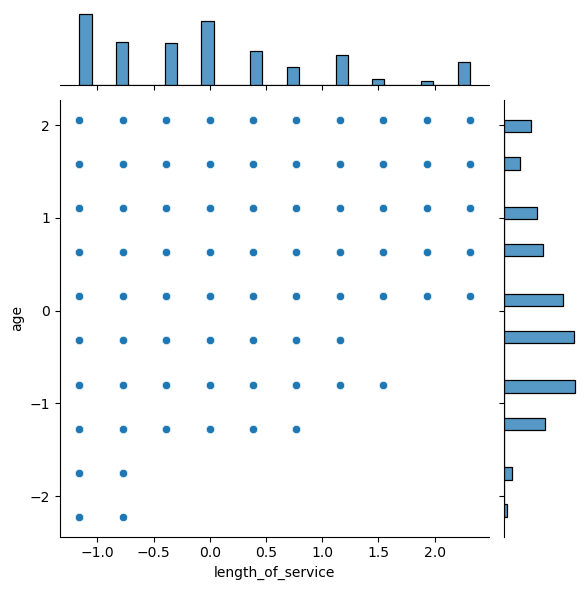

In [86]:
# Joint Distribution Plot
sns.jointplot(x='length_of_service', y='age', data=df_hr_new)

# Display the plot
plt.show()

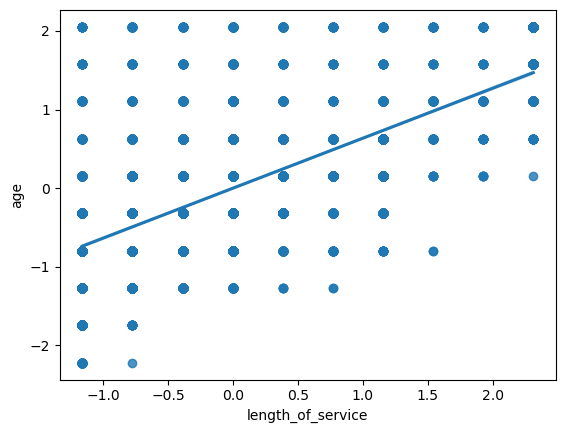

In [87]:
# Create a Scatterplot using seaborn
sns.regplot(x='length_of_service', y='age', data=df_hr_new) # axes plot

# Display the plot
plt.show()

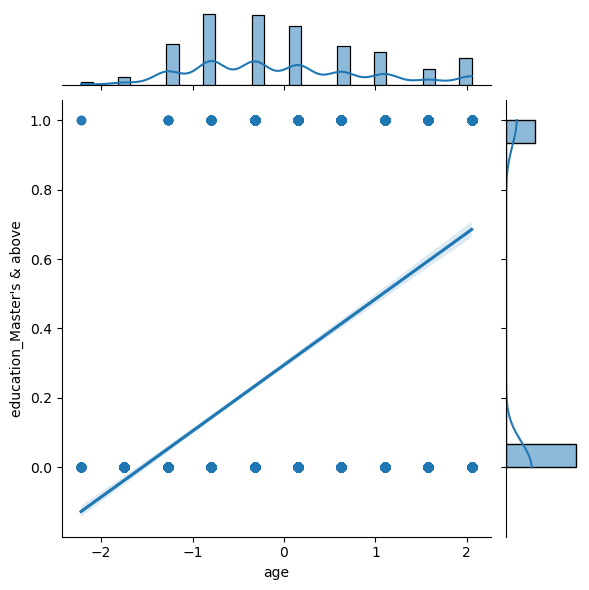

In [88]:
# Create a Scatterplot and Histogram using seaborn (jointplot)
sns.jointplot(x='age', y="education_Master's & above", data=df_hr_new, kind="reg") # axes plot

# Display the plot
plt.show()

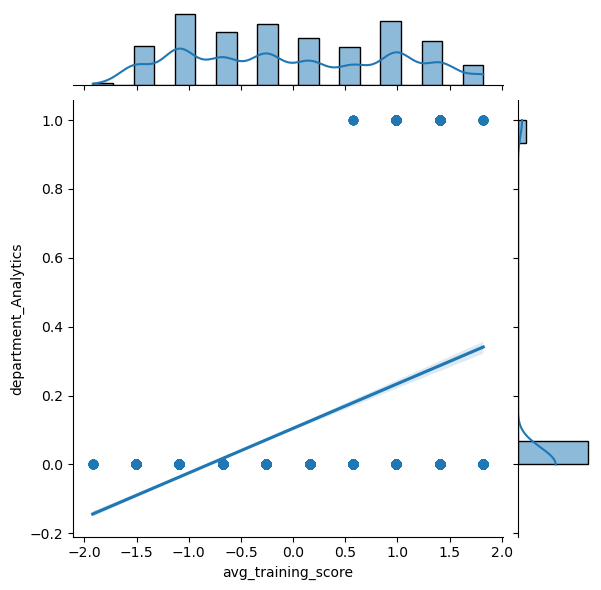

In [89]:
# Create a Scatterplot using seaborn
sns.jointplot(x='avg_training_score', y='department_Analytics', data=df_hr_new, kind="reg") # axes plot

# Display the plot
plt.show()

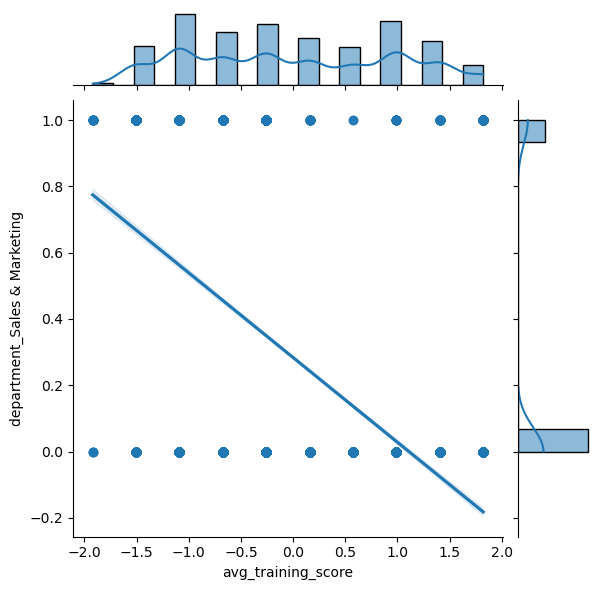

In [90]:
# Create a Scatterplot using seaborn
sns.jointplot(x='avg_training_score', y='department_Sales & Marketing', data=df_hr_new, kind="reg") # axes plot

# Display the plot
plt.show()

### 1.4 Export the data <a id="1.4."></a>
[Back to Top](#top)

In [91]:
#export without the index
df_hr_new.to_csv('hr_data_new.csv', index = False)

### Load into Machine Learning Model for Testing

In [92]:
type(df_hr_new)

pandas.core.frame.DataFrame

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    df_hr_new.drop('is_promoted', axis=1), df_hr_new['is_promoted'], test_size=0.3, random_state=999)

X_train.shape, X_test.shape

((6535, 29), (2801, 29))

In [94]:
logreg = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver
# logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [95]:
y_train_preds_logreg = logreg.predict(X_train)
y_test_preds_logreg = logreg.predict(X_test)

In [96]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg

train_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on train data is {train_accuracy_logreg:.2f}%.")
#Logistic Regression Model

logreg = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver

# logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here

logreg.fit(X_train, y_train)
LogisticRegression(solver='liblinear')

y_train_preds_logreg = logreg.predict(X_train)

y_test_preds_logreg = logreg.predict(X_test)

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg

test_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on test data is {test_accuracy_logreg:.2f}%.")

The LogReg Model's accuracy on train data is 76.86%.
The LogReg Model's accuracy on test data is 78.72%.


## 2. Airbnb <a id="AIRBNB"></a>
[Back to Top](#top)

### 2.1 Load and Explore the data <a id="2.1."></a>
[Back to Top](#top)

In [97]:
df_listings_ori = pd.read_csv("./datasets/listings.csv")
df_listings_backup = df_listings_ori.copy() #keep a copy of df 

In [98]:
df_listings_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [99]:
df_listings_ori.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

In [100]:
# % of null values
df_listings_ori.isnull().mean()

id                                0.000000
name                              0.000253
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.348805
reviews_per_month                 0.348805
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [101]:
# Showing Unique Values for region 
df_listings_ori['neighbourhood_group'].value_counts()

Central Region       6309
West Region           540
East Region           508
North-East Region     346
North Region          204
Name: neighbourhood_group, dtype: int64

### 2.1.1. Subset of Data <a id="2.1.1."></a>
[Back to Top](#top)

In [102]:
# Reducing the dataset to a subset 
df_listings_new = df_listings_ori[df_listings_ori['neighbourhood_group']=='Central Region']

In [103]:
df_listings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6309 entries, 1 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6309 non-null   int64  
 1   name                            6307 non-null   object 
 2   host_id                         6309 non-null   int64  
 3   host_name                       6309 non-null   object 
 4   neighbourhood_group             6309 non-null   object 
 5   neighbourhood                   6309 non-null   object 
 6   latitude                        6309 non-null   float64
 7   longitude                       6309 non-null   float64
 8   room_type                       6309 non-null   object 
 9   price                           6309 non-null   int64  
 10  minimum_nights                  6309 non-null   int64  
 11  number_of_reviews               6309 non-null   int64  
 12  last_review                     41

In [104]:
df_listings_new.head()

id                                               name  host_id  \
1    50646                    Pleasant Room along Bukit Timah   227796   
10  275343  Conveniently located City Room!( (Phone number...  1439258   
11  275344              15 mins to Outram MRT Single Room (B)  1439258   
13  294281                     5 mins walk from Newton subway  1521514   
14  324945                 20 Mins to Sentosa @ Hilltop ! (8)  1439258   

        host_name neighbourhood_group neighbourhood  latitude  longitude  \
1         Sujatha      Central Region   Bukit Timah   1.33235  103.78521   
10  K2 Guesthouse      Central Region   Bukit Merah   1.28875  103.80814   
11  K2 Guesthouse      Central Region   Bukit Merah   1.28837  103.81099   
13      Elizabeth      Central Region        Newton   1.31125  103.83816   
14  K2 Guesthouse      Central Region   Bukit Merah   1.28976  103.80896   

       room_type  price  minimum_nights  number_of_reviews last_review  \
1   Private room     81              90                 18  2014-12-26   
10  Private room     44              15                 18  2019-04-21   
11  Private room     40              30                 10  2018-09-13   
13  Private room     65               2                125  2019-08-22   
14  Private room     44              30                 13  2019-02-02   

    reviews_per_month  calculated_host_listings_count  availability_365  
1                0.28                               1               365  
10               0.23                              32               331  
11               0.11                              32               276  
13               1.35                               6               336  
14               0.15                              32               340

### 2.1.2. Statistical Approach <a id="2.1.2."></a>
[Back to Top](#top)

In [105]:
# % of null values
df_listings_new.isnull().mean()

id                                0.000000
name                              0.000317
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.343161
reviews_per_month                 0.343161
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [106]:
# Show description of data for numercial data
df_listings_new.describe()

id       host_id     latitude    longitude         price  \
count  6.309000e+03  6.309000e+03  6309.000000  6309.000000   6309.000000   
mean   2.411995e+07  9.267363e+07     1.303630   103.850989    176.629418   
std    1.005719e+07  8.376708e+07     0.016459     0.025049    293.992420   
min    5.064600e+04  2.366600e+04     1.243870   103.763270      0.000000   
25%    1.660310e+07  2.114972e+07     1.290980   103.839270     81.000000   
50%    2.643067e+07  6.344891e+07     1.306000   103.849320    135.000000   
75%    3.277421e+07  1.598048e+08     1.314480   103.862200    208.000000   
max    3.811276e+07  2.885676e+08     1.365830   103.918220  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     6309.000000        6309.000000        4144.000000   
mean        15.342844          13.037724           1.079105   
std         36.047130          29.313302           1.286324   
min          1.000000           0.000000           0.010000   
25%          2.000000           0.000000           0.200000   
50%          3.000000           2.000000           0.580000   
75%         10.000000          11.000000           1.472500   
max       1000.000000         307.000000          13.000000   

       calculated_host_listings_count  availability_365  
count                     6309.000000       6309.000000  
mean                        47.304169        215.435727  
std                         67.690029        143.593737  
min                          1.000000          0.000000  
25%                          3.000000         63.000000  
50%                         14.000000        269.000000  
75%                         67.000000        355.000000  
max                        274.000000        365.000000

### 2.1.3. Visualization Approach <a id="2.1.3."></a>
[Back to Top](#top)

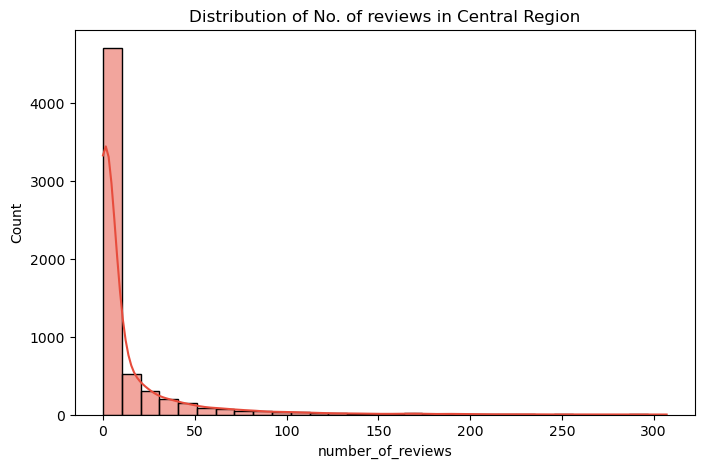

In [107]:
# Create a figure and subplot
fig, priceDistribution = plt.subplots(figsize=(8,5))

# Plot Historgram
priceDistribution = sns.histplot(df_listings_new['number_of_reviews'], bins=30, kde=True, color='#E74C3C')
plt.title('Distribution of No. of reviews in Central Region')

# Display
plt.show()

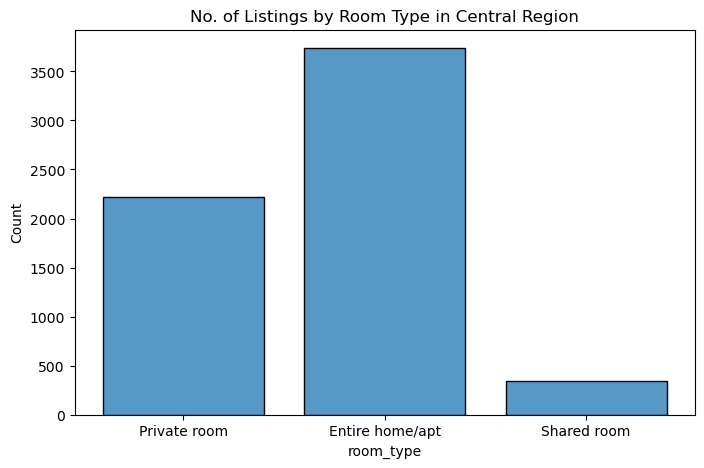

In [108]:
# Create a figure and subplot
fig, numRoomType = plt.subplots(figsize=(8,5))

# Plot Histogram
numRoomType = sns.histplot(data=df_listings_new, x="room_type", shrink=.8)
plt.title('No. of Listings by Room Type in Central Region')

# Display
plt.show()

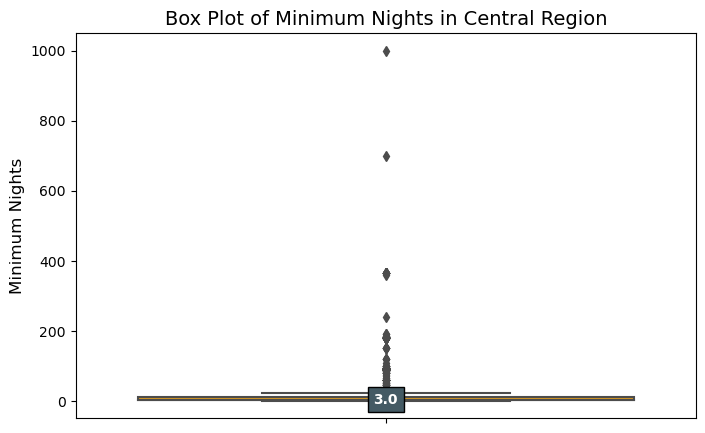

In [109]:
# Create a figure and subplot
fig , boxPlotMinimumNight = plt.subplots(figsize=(8,5))

# not promoted avg_training_score vs. promoted avg_training_score
boxPlotMinimumNight = sns.boxplot(y='minimum_nights', data=df_listings_new,color = '#FFA500')

# Customise the plot
boxPlotMinimumNight.set_title('Box Plot of Minimum Nights in Central Region', fontsize = 14)
boxPlotMinimumNight.set_ylabel('Minimum Nights', fontsize = 12)

# Median Label
ax = boxPlotMinimumNight.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the intervalx of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(cat, y, f'{y}', ha='center', va='center', fontweight='bold', 
            size=10,color='white',bbox=dict(facecolor='#445A64'))
    
# Display box plot
plt.show()

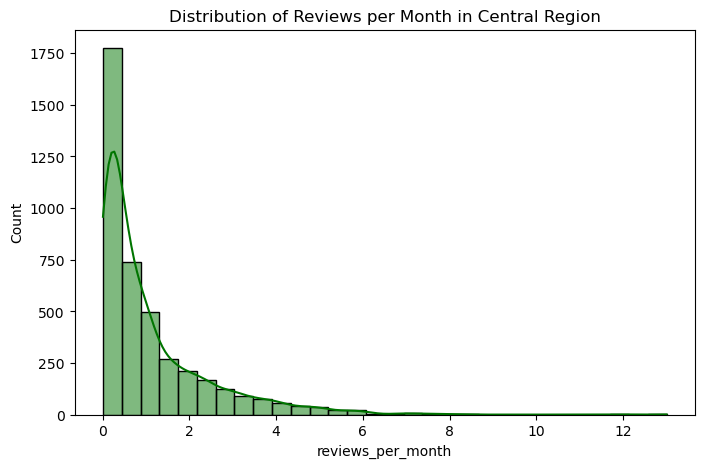

In [110]:
# Create a figure and subplot
fig, reviewPerMonth = plt.subplots(figsize=(8,5))

# Plot Historgram
reviewPerMonth = sns.histplot(df_listings_new['reviews_per_month'], bins=30, kde=True, color='#007500')
plt.title('Distribution of Reviews per Month in Central Region')

# Display
plt.show()

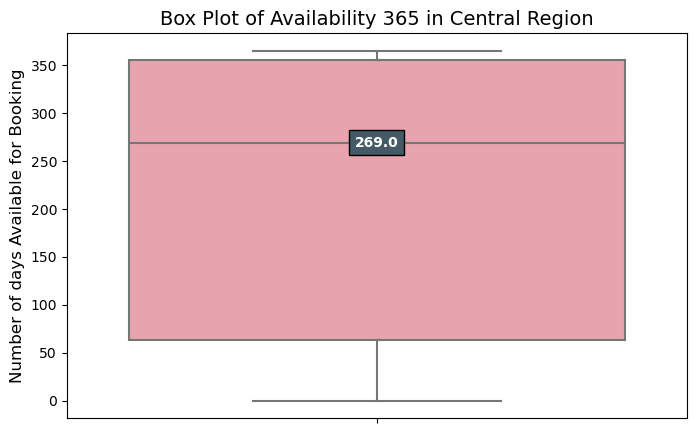

In [111]:
# Create a figure and subplot
fig , boxPlotAvailability = plt.subplots(figsize=(8,5))

# not promoted avg_training_score vs. promoted avg_training_score
boxPlotAvailability = sns.boxplot(y='availability_365', data=df_listings_new,color = '#F298A6')

# Customise the plot
boxPlotAvailability.set_title('Box Plot of Availability 365 in Central Region', fontsize = 14)
boxPlotAvailability.set_ylabel('Number of days Available for Booking', fontsize = 12)

# Median Label
ax = boxPlotAvailability.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(cat, y, f'{y}', ha='center', va='center', fontweight='bold', 
            size=10,color='white',bbox=dict(facecolor='#445A64'))
    
# Display box plot
plt.show()

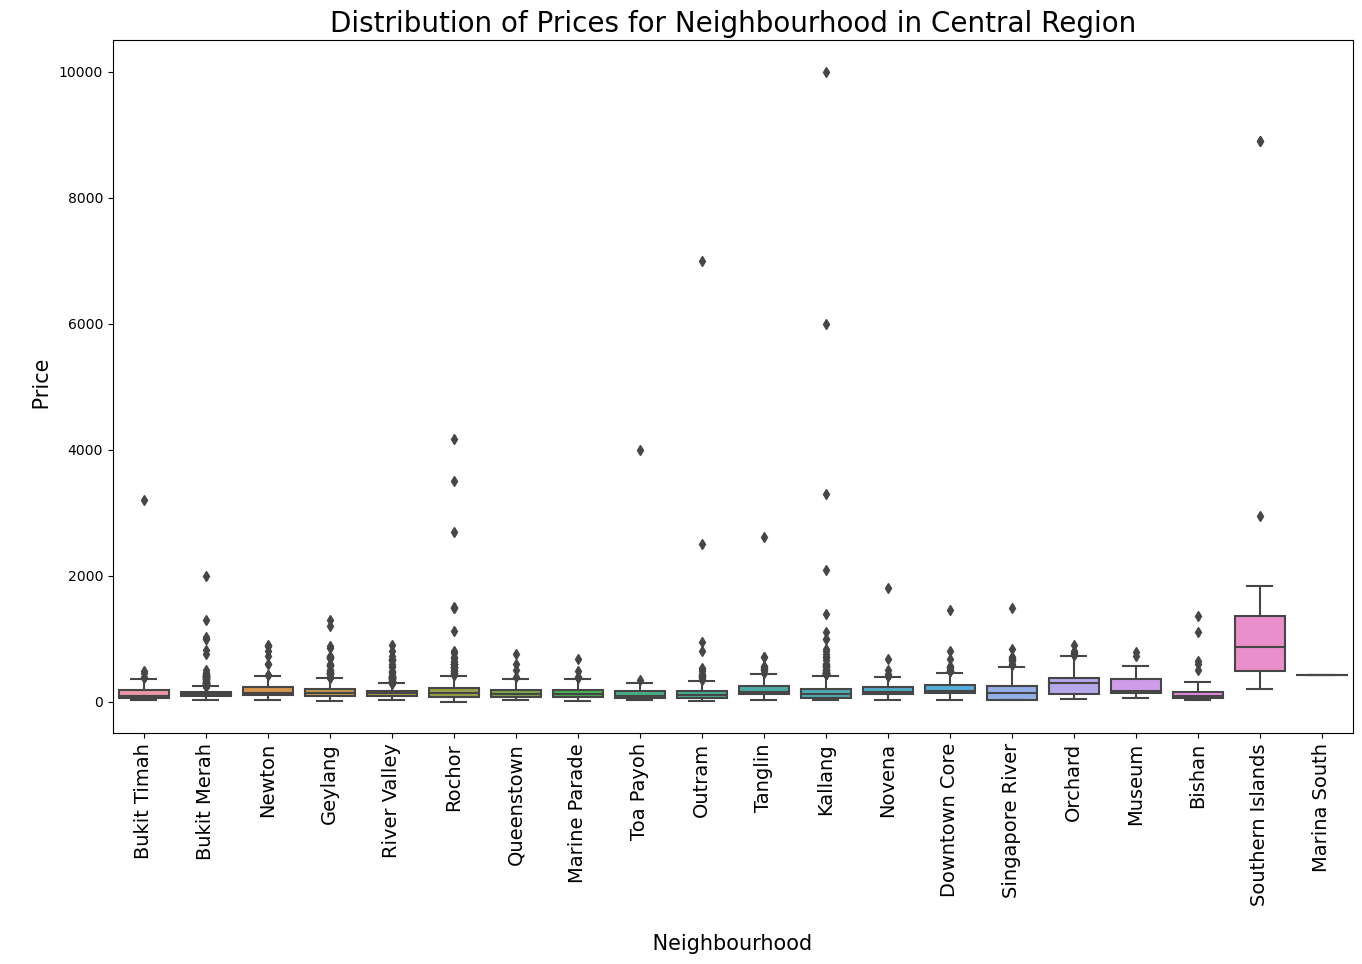

In [112]:
# Create a figure and subplot
fig, neighbourhoodPrice = plt.subplots(figsize=(16,9))

# Violin plot
neighbourhoodPrice = sns.boxplot(x='neighbourhood', y='price', data=df_listings_new)

# Customise plot
neighbourhoodPrice.set_title('Distribution of Prices for Neighbourhood in Central Region', fontsize = 20)
neighbourhoodPrice.set_ylabel('\n Price', fontsize = 15)
neighbourhoodPrice.set_xlabel('\n Neighbourhood ', fontsize = 15)

labels = df_listings_new['neighbourhood'].unique().tolist()
neighbourhoodPrice.set_xticklabels(labels,fontsize=14,rotation=90)

# Display the plot
plt.show()

### 2.2 Cleanse and Transform the data <a id="2.2."></a>
[Back to Top](#top)

### 2.2.1. Outliers <a id="2.2.1."></a>
[Back to Top](#top)

In [113]:
# find numerical variables
num_cols = [n for n in df_listings_new.columns if df_listings_new[n].dtypes !='O']
df_listings_new[num_cols].isnull().mean()
# In this case, we can see that not all numerical columns are worth finding outliers, such as id, host_id,latitude,longitude
# Some columns that are worth finding outliers are price, minimum_nights, number_of_reviews,
# calculated_host_listings_count and availability_365

id                                0.000000
host_id                           0.000000
latitude                          0.000000
longitude                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
reviews_per_month                 0.343161
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

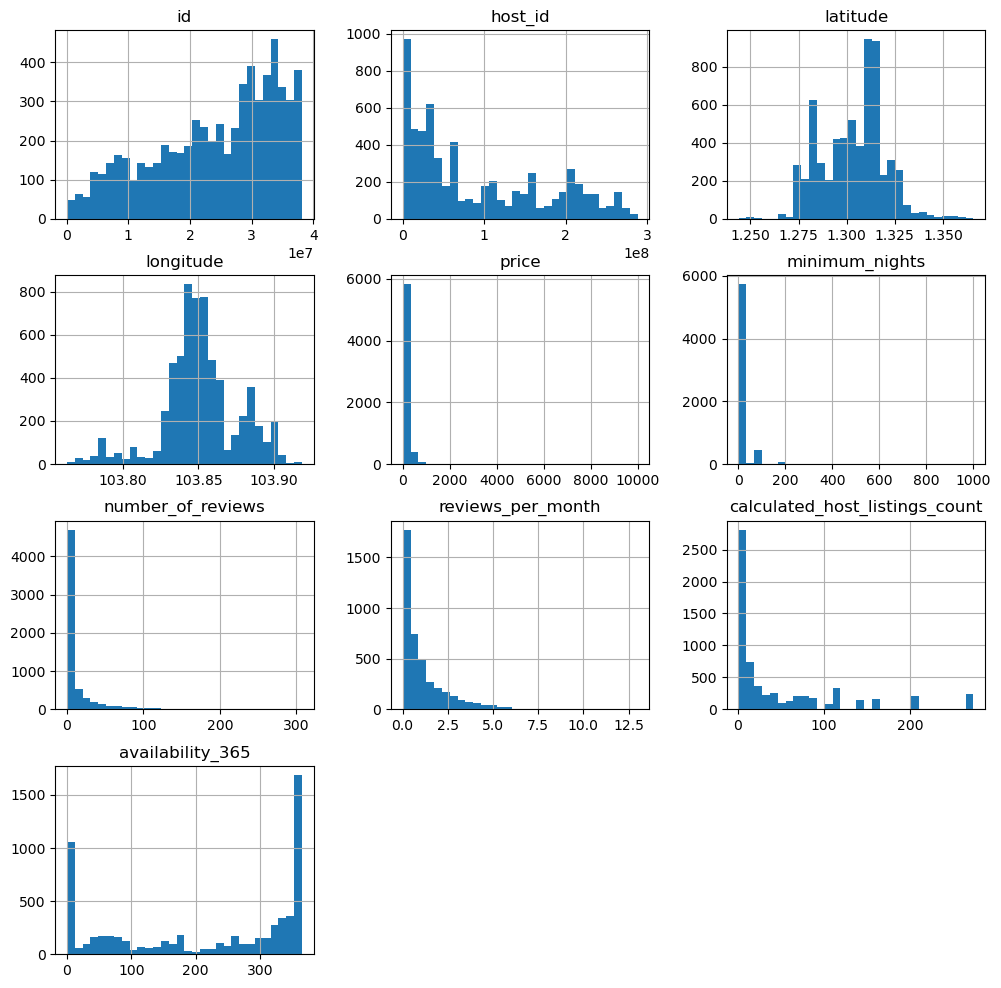

In [114]:
overviewOfNumCols = df_listings_new.hist(bins=30, figsize=(12,12))
plt.show()

In [115]:
# Finding outliersestimate 1.5 times of Interquartile Range (IQR) to calculate the boundaries
def find_boundaries(df, variable):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #Finding the IQR using .quantile(.75 and .25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5) #Formula 
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [116]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel("\n" + variable + " quantities")

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [117]:
# new dataframe defined to compare before and after results of outlier treatment
df_listings_newBeforeOutlier = df_listings_new.copy()

<b> Price (Trimming)</b>

In [118]:
# Find price outliers (target)
upper_boundary, lower_boundary = find_boundaries(df_listings_new, 'price')
outliers_Price = np.where(df_listings_new['price'] > upper_boundary, True,
                    np.where(df_listings_new['price'] < lower_boundary, True, False))
outliers_Price.sum() 

314

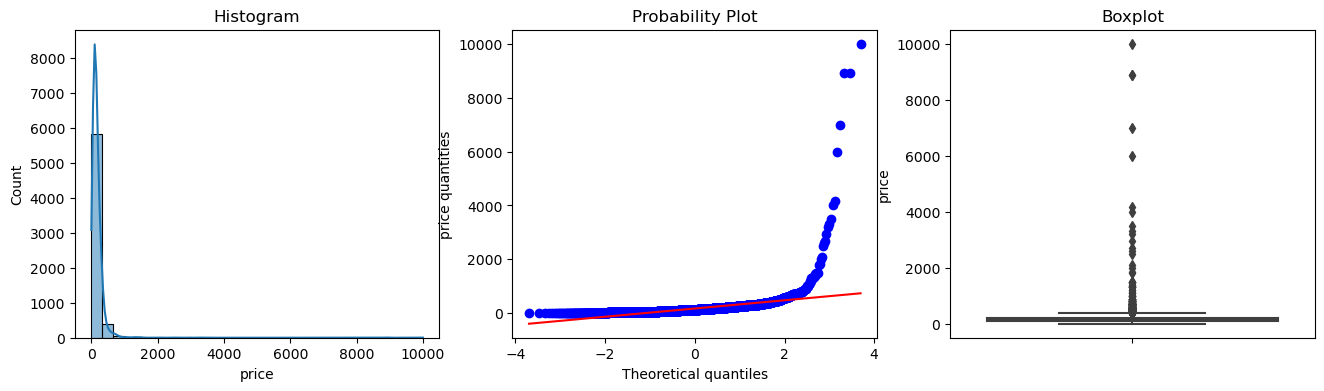

In [119]:
# Before
diagnostic_plots(df_listings_newBeforeOutlier, 'price')

In [120]:
# let's trim the dataset by removing price outliers
df_listings_new= df_listings_new.loc[~outliers_Price]

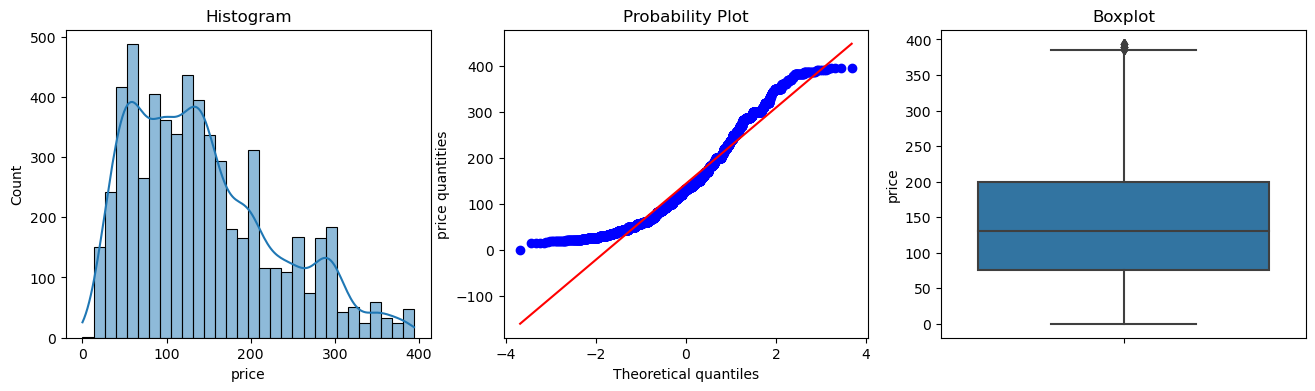

In [121]:
# After
diagnostic_plots(df_listings_new, 'price')

In [122]:
df_listings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 1 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5995 non-null   int64  
 1   name                            5994 non-null   object 
 2   host_id                         5995 non-null   int64  
 3   host_name                       5995 non-null   object 
 4   neighbourhood_group             5995 non-null   object 
 5   neighbourhood                   5995 non-null   object 
 6   latitude                        5995 non-null   float64
 7   longitude                       5995 non-null   float64
 8   room_type                       5995 non-null   object 
 9   price                           5995 non-null   int64  
 10  minimum_nights                  5995 non-null   int64  
 11  number_of_reviews               5995 non-null   int64  
 12  last_review                     39

<b> Minimum Nights (Winsorizer 95% Quantiles Right)</b>

In [123]:
# Find minimum_nights outliers
upper_boundary, lower_boundary = find_boundaries(df_listings_new, 'minimum_nights')
outliers_MinimumNight = np.where(df_listings_new['minimum_nights'] > upper_boundary, True,
                    np.where(df_listings_new['minimum_nights'] < lower_boundary, True, False))
outliers_MinimumNight.sum() 

1048

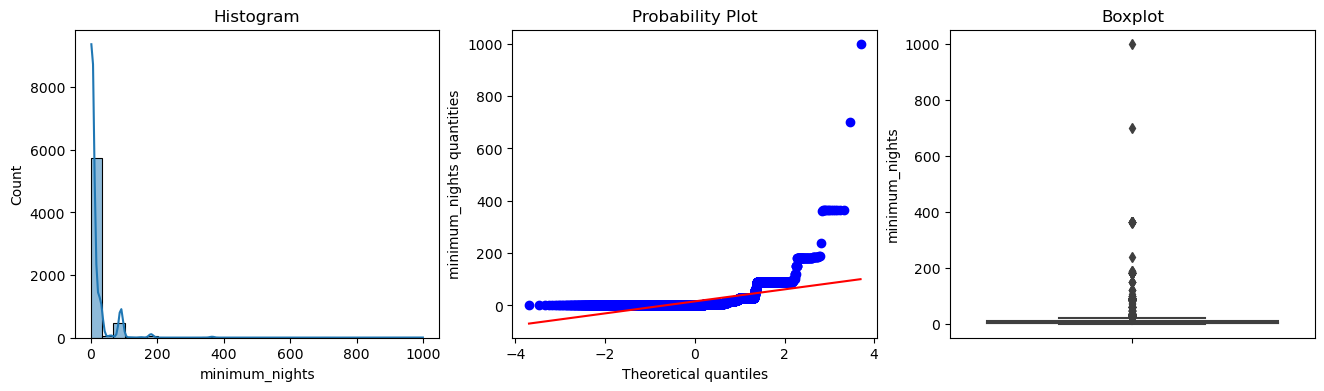

In [124]:
# Before
diagnostic_plots(df_listings_newBeforeOutlier, 'minimum_nights')

In [125]:
# create the capper
winsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='right', # cap left, right or both tails
                        fold =0.1,
                        variables=['minimum_nights'])

winsorizer.fit(df_listings_new)

Winsorizer(capping_method='quantiles', fold=0.1, variables=['minimum_nights'])

In [126]:
# transform
df_listings_new = winsorizer.transform(df_listings_new)

In [127]:
winsorizer.right_tail_caps_

{'minimum_nights': 30.0}

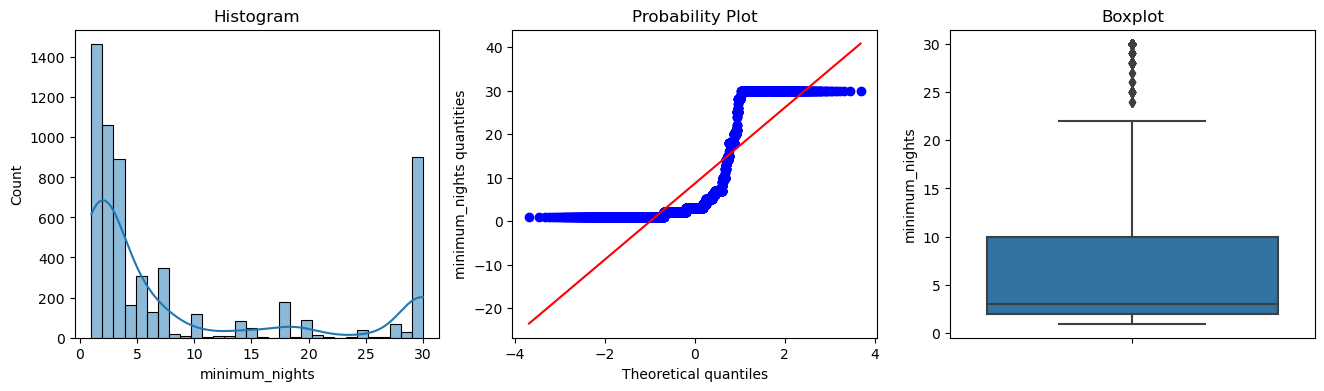

In [128]:
# After
diagnostic_plots(df_listings_new, 'minimum_nights')

<b> No. of Reviews (Winsorizer 1.5 IQR Right)</b>

In [129]:
upper_boundary, lower_boundary = find_boundaries(df_listings_new, 'number_of_reviews')
outliers_NumReviews = np.where(df_listings_new['number_of_reviews'] > upper_boundary, True,
                    np.where(df_listings_new['number_of_reviews'] < lower_boundary, True, False))

outliers_NumReviews.sum()

843

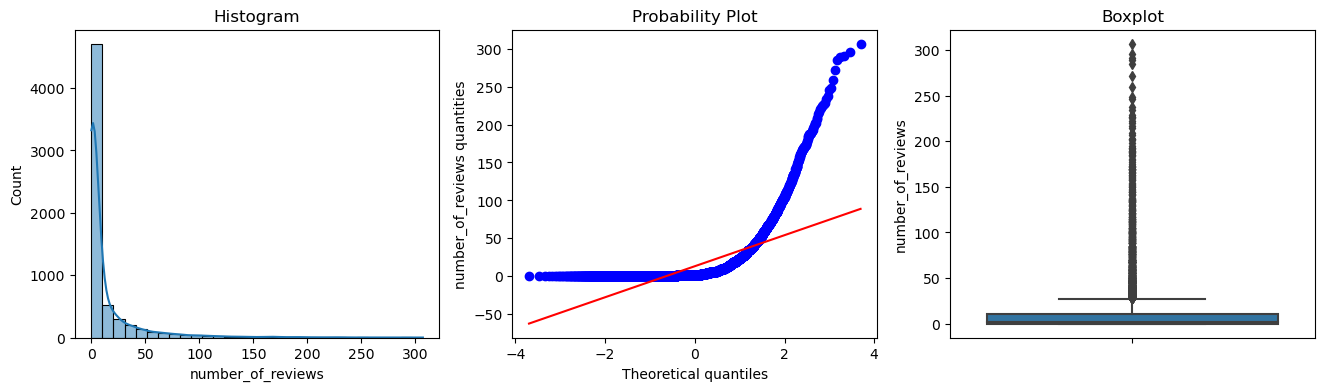

In [130]:
# Before
diagnostic_plots(df_listings_newBeforeOutlier, 'number_of_reviews')

In [131]:
# create the capper
winsorizer = Winsorizer(capping_method ='gaussian', 
                        tail='right', # cap left, right or both tails
                        fold =1.5,
                        variables=['number_of_reviews'])

winsorizer.fit(df_listings_new)

Winsorizer(fold=1.5, variables=['number_of_reviews'])

In [132]:
winsorizer.right_tail_caps_

{'number_of_reviews': 57.073563085675346}

In [133]:
# transform
df_listings_new = winsorizer.transform(df_listings_new)

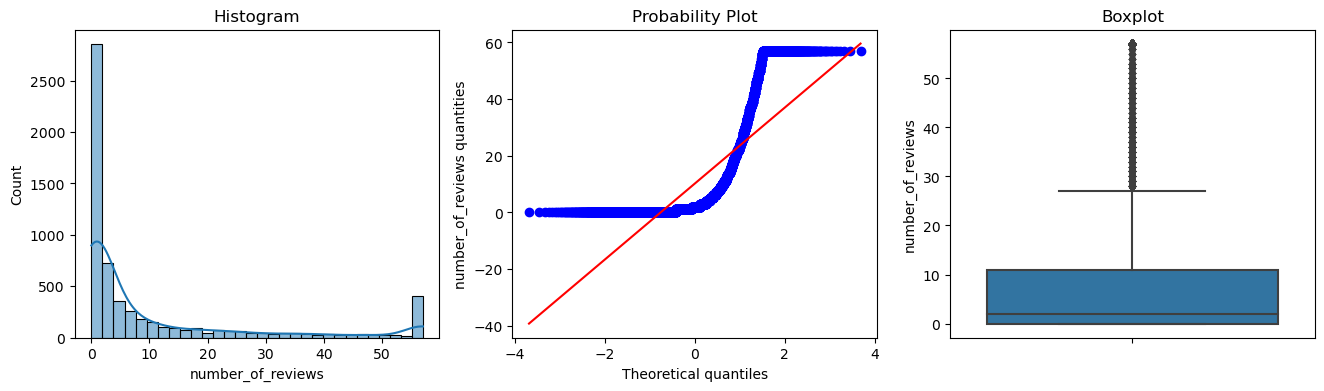

In [134]:
# After
diagnostic_plots(df_listings_new, 'number_of_reviews')

<b> Calculated Host Listings Count (Winsorizer 95% Quantiles Right) </b>

In [135]:
upper_boundary, lower_boundary = find_boundaries(df_listings_new, 'calculated_host_listings_count')
outliers_CalculatedHostListCount = np.where(df_listings_new['calculated_host_listings_count'] > upper_boundary, True,
                    np.where(df_listings_new['calculated_host_listings_count'] < lower_boundary, True, False))

outliers_CalculatedHostListCount.sum() 

435

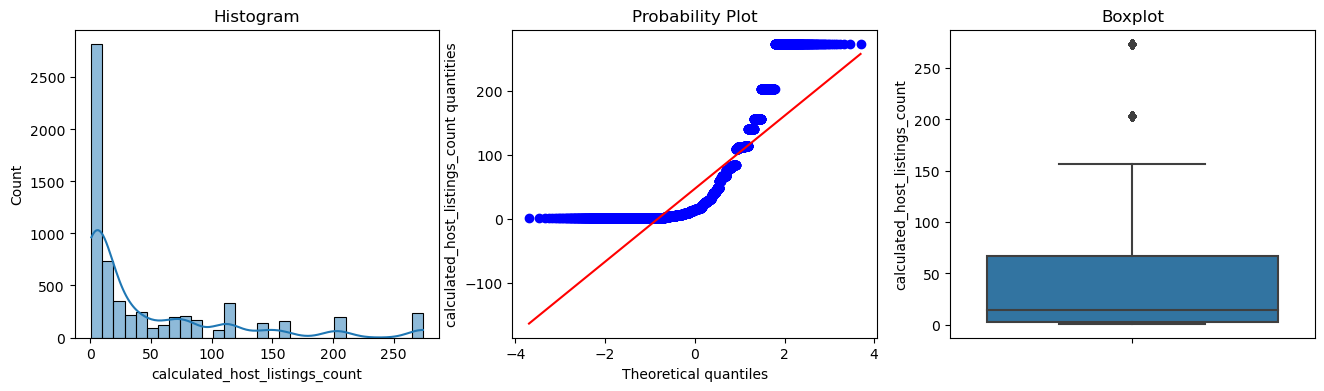

In [136]:
# Before
diagnostic_plots(df_listings_newBeforeOutlier, 'calculated_host_listings_count')

In [137]:
# create the capper
winsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='right', # cap left, right or both tails
                        fold =0.05,
                        variables=['calculated_host_listings_count'])

winsorizer.fit(df_listings_new)

Winsorizer(capping_method='quantiles', fold=0.05,
           variables=['calculated_host_listings_count'])

In [138]:
winsorizer.right_tail_caps_

{'calculated_host_listings_count': 203.0}

In [139]:
# transform
df_listings_new = winsorizer.transform(df_listings_new)

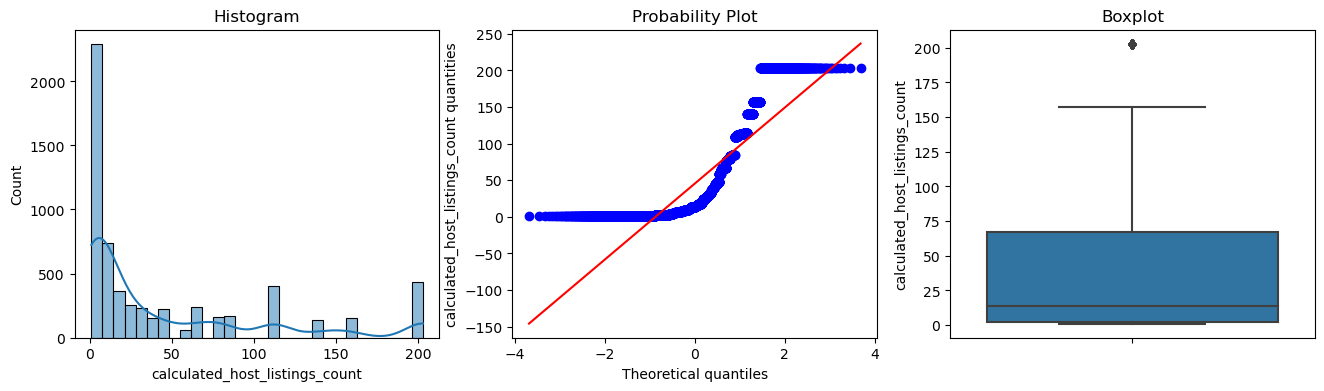

In [140]:
# After
diagnostic_plots(df_listings_new, 'calculated_host_listings_count')

<b> Availability 365</b>

In [141]:
upper_boundary, lower_boundary = find_boundaries(df_listings_new, 'availability_365')
outliers_Available365 = np.where(df_listings_new['availability_365'] > upper_boundary, True,
                    np.where(df_listings_new['availability_365'] < lower_boundary, True, False))

outliers_Available365.sum() 

0

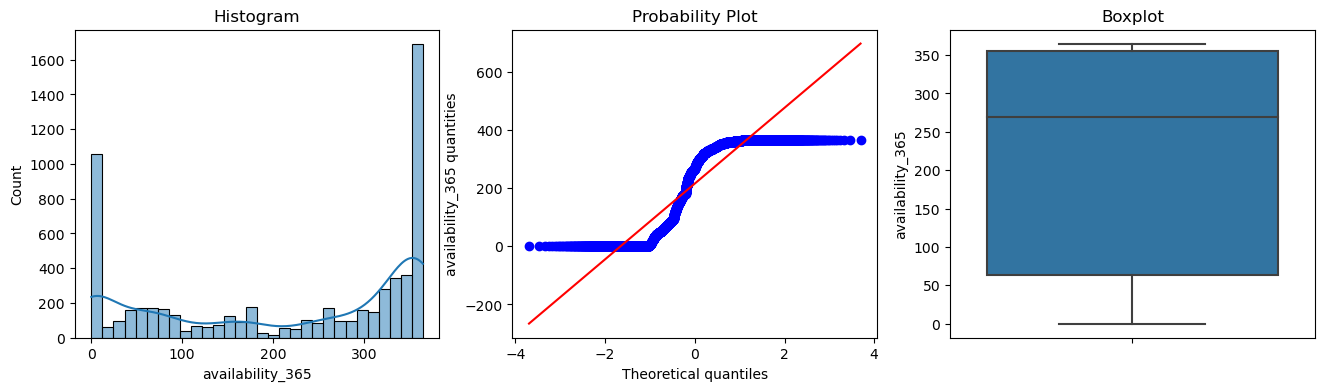

In [142]:
# Before
diagnostic_plots(df_listings_newBeforeOutlier, 'availability_365')

### 2.2.2. Extract Features from Unstructured Data <a id="2.2.2."></a>
[Back to Top](#top)

In [143]:
df_listings_new.head()

id                                               name  host_id  \
1    50646                    Pleasant Room along Bukit Timah   227796   
10  275343  Conveniently located City Room!( (Phone number...  1439258   
11  275344              15 mins to Outram MRT Single Room (B)  1439258   
13  294281                     5 mins walk from Newton subway  1521514   
14  324945                 20 Mins to Sentosa @ Hilltop ! (8)  1439258   

        host_name neighbourhood_group neighbourhood  latitude  longitude  \
1         Sujatha      Central Region   Bukit Timah   1.33235  103.78521   
10  K2 Guesthouse      Central Region   Bukit Merah   1.28875  103.80814   
11  K2 Guesthouse      Central Region   Bukit Merah   1.28837  103.81099   
13      Elizabeth      Central Region        Newton   1.31125  103.83816   
14  K2 Guesthouse      Central Region   Bukit Merah   1.28976  103.80896   

       room_type  price  minimum_nights  number_of_reviews last_review  \
1   Private room     81            30.0          18.000000  2014-12-26   
10  Private room     44            15.0          18.000000  2019-04-21   
11  Private room     40            30.0          10.000000  2018-09-13   
13  Private room     65             2.0          57.073563  2019-08-22   
14  Private room     44            30.0          13.000000  2019-02-02   

    reviews_per_month  calculated_host_listings_count  availability_365  
1                0.28                             1.0               365  
10               0.23                            32.0               331  
11               0.11                            32.0               276  
13               1.35                             6.0               336  
14               0.15                            32.0               340

In [144]:
# Convert column to datetime column
df_listings_new['last_review'] = pd.to_datetime(df_listings_new['last_review'],format ='%Y/%m/%d')

In [145]:
# Create new features/variables?
df_listings_new['last_review_year'] = df_listings_new['last_review'].dt.year
df_listings_new['last_review_month'] = df_listings_new['last_review'].dt.month
df_listings_new['last_review_day'] = df_listings_new['last_review'].dt.day

In [146]:
df_listings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 1 to 7906
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5995 non-null   int64         
 1   name                            5994 non-null   object        
 2   host_id                         5995 non-null   int64         
 3   host_name                       5995 non-null   object        
 4   neighbourhood_group             5995 non-null   object        
 5   neighbourhood                   5995 non-null   object        
 6   latitude                        5995 non-null   float64       
 7   longitude                       5995 non-null   float64       
 8   room_type                       5995 non-null   object        
 9   price                           5995 non-null   int64         
 10  minimum_nights                  5995 non-null   float64       
 11  numb

In [147]:
# Remove 'last_review', using last_review_year, month and year instead
df_listings_new = df_listings_new.drop(labels = 'last_review', axis=1)

### 2.2.3. Missing Value Imputation <a id="2.2.3."></a>
[Back to Top](#top)

In [148]:
# find the percentage of missing data per variable 
df_listings_new.isnull().mean()

id                                0.000000
name                              0.000167
host_id                           0.000000
host_name                         0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
reviews_per_month                 0.337281
calculated_host_listings_count    0.000000
availability_365                  0.000000
last_review_year                  0.337281
last_review_month                 0.337281
last_review_day                   0.337281
dtype: float64

In [149]:
# first we need to make a list of columns that has missing data
features_num_median = ['reviews_per_month','last_review_year','last_review_month','last_review_day'] 
features_cat_frequent = ["name"]

In [150]:
# we instantiate each imputer within a pipeline

pipe = Pipeline(steps=[
    ('imp_num_mean', mdi.MeanMedianImputer(imputation_method = 'median', variables=features_num_median)),
    ('imp_cat_frequent', mdi.CategoricalImputer(variables = features_cat_frequent, imputation_method='frequent'))
])

In [151]:
# now we fit the preprocessor
pipe.fit(df_listings_new)

Pipeline(steps=[('imp_num_mean',
                 MeanMedianImputer(variables=['reviews_per_month',
                                              'last_review_year',
                                              'last_review_month',
                                              'last_review_day'])),
                ('imp_cat_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['name']))])

In [152]:
# and now we impute the data
df_listings_new = pipe.transform(df_listings_new)

In [153]:
df_listings_new.isnull().mean()

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
last_review_year                  0.0
last_review_month                 0.0
last_review_day                   0.0
dtype: float64

### 2.2.4. Categorical Data Transformation <a id="2.2.4."></a>
[Back to Top](#top)

In [154]:
find_unique_values(df_listings_new)

name :    ['Pleasant Room along Bukit Timah'
 'Conveniently located City Room!( (Phone number hidden by Airbnb) )'
 '15 mins to Outram MRT Single Room (B)' ...
 '[ Farrer Park ] New City Fringe CBD Mins to MRT'
 'Cheap Master Room in Central of Singapore'
 'Amazing room with private bathroom walk to Orchard'] 	 5624
host_name :    ['Sujatha' 'K2 Guesthouse' 'Elizabeth' ... 'Quoc' 'Jolene' 'Ryokuka'] 	 1227
neighbourhood_group :    ['Central Region'] 	 1
neighbourhood :    ['Bukit Timah' 'Bukit Merah' 'Newton' 'Geylang' 'River Valley' 'Rochor'
 'Queenstown' 'Marine Parade' 'Toa Payoh' 'Outram' 'Tanglin' 'Kallang'
 'Novena' 'Downtown Core' 'Singapore River' 'Orchard' 'Museum' 'Bishan'
 'Southern Islands'] 	 19
room_type :    ['Private room' 'Entire home/apt' 'Shared room'] 	 3


In [155]:
# Remove 'neighbourhood_group ' as we are focusing on Central Region 
df_listings_new = df_listings_new.drop(labels = 'neighbourhood_group', axis=1)

In [156]:
# Copy before encode
df_listings_newBeforeEnc = df_listings_new.copy()

In [157]:
# Define numerical columns for df_listings_new before encoding
num_cols = [n for n in df_listings_newBeforeEnc.columns if df_listings_newBeforeEnc[n].dtypes !='O']

<b> One-Hot Encoding on Top 5 Categories </b>

In [158]:
ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=5,  
    
    # we can select which variables to encode
    variables=['name','host_name'],
    
    # to indicate if we drop one of the binaries
    drop_last=False)

# let's fit the encoder to the dataset set
ohe_enc.fit(df_listings_new)

OneHotEncoder(top_categories=5, variables=['name', 'host_name'])

In [159]:
# transform encoding to dataset
df_listings_new = ohe_enc.transform(df_listings_new)

<b> One-Hot Encoding </b>

In [160]:
ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories=None,  
    
    # we can select which variables to encode
    variables=['neighbourhood','room_type'],
    
    # to indicate if we drop one of the binaries
    drop_last=False)

# let's fit the encoder to the dataset set
ohe_enc.fit(df_listings_new)

OneHotEncoder(variables=['neighbourhood', 'room_type'])

In [161]:
# transform encoding to dataset
df_listings_new = ohe_enc.transform(df_listings_new)

In [162]:
df_listings_new.head()

id  host_id  latitude  longitude  price  minimum_nights  \
1    50646   227796   1.33235  103.78521     81            30.0   
10  275343  1439258   1.28875  103.80814     44            15.0   
11  275344  1439258   1.28837  103.81099     40            30.0   
13  294281  1521514   1.31125  103.83816     65             2.0   
14  324945  1439258   1.28976  103.80896     44            30.0   

    number_of_reviews  reviews_per_month  calculated_host_listings_count  \
1           18.000000               0.28                             1.0   
10          18.000000               0.23                            32.0   
11          10.000000               0.11                            32.0   
13          57.073563               1.35                             6.0   
14          13.000000               0.15                            32.0   

    availability_365  ...  neighbourhood_Novena  neighbourhood_Downtown Core  \
1                365  ...                     0                            0   
10               331  ...                     0                            0   
11               276  ...                     0                            0   
13               336  ...                     0                            0   
14               340  ...                     0                            0   

    neighbourhood_Singapore River  neighbourhood_Orchard  \
1                               0                      0   
10                              0                      0   
11                              0                      0   
13                              0                      0   
14                              0                      0   

    neighbourhood_Museum  neighbourhood_Bishan  \
1                      0                     0   
10                     0                     0   
11                     0                     0   
13                     0                     0   
14                     0                     0   

    neighbourhood_Southern Islands  room_type_Private room  \
1                                0                       1   
10                               0                       1   
11                               0                       1   
13                               0                       1   
14                               0                       1   

    room_type_Entire home/apt  room_type_Shared room  
1                           0                      0  
10                          0                      0  
11                          0                      0  
13                          0                      0  
14                          0                      0  

[5 rows x 45 columns]

### 2.2.5. Numerical DataTransformation <a id="2.2.5."></a>
[Back to Top](#top)

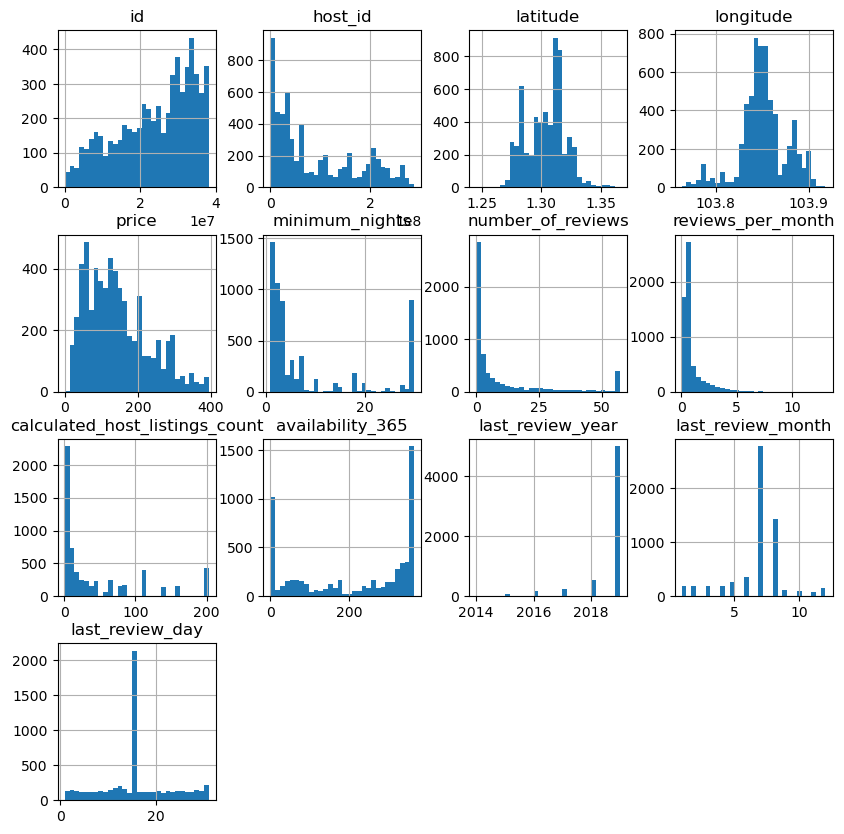

In [163]:
overviewOfNumCols = df_listings_newBeforeEnc[num_cols].hist(bins=30, figsize=(10,10))
plt.show()

In [164]:
# Backup
df_listings_newBeforeTrans = df_listings_new.copy()

<b> ID </b>

In [165]:
# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = ['id'])

# fit transformer to the dataframe
yjt.fit(df_listings_new)
# transform indicated variables
df_listings_new = yjt.transform(df_listings_new)

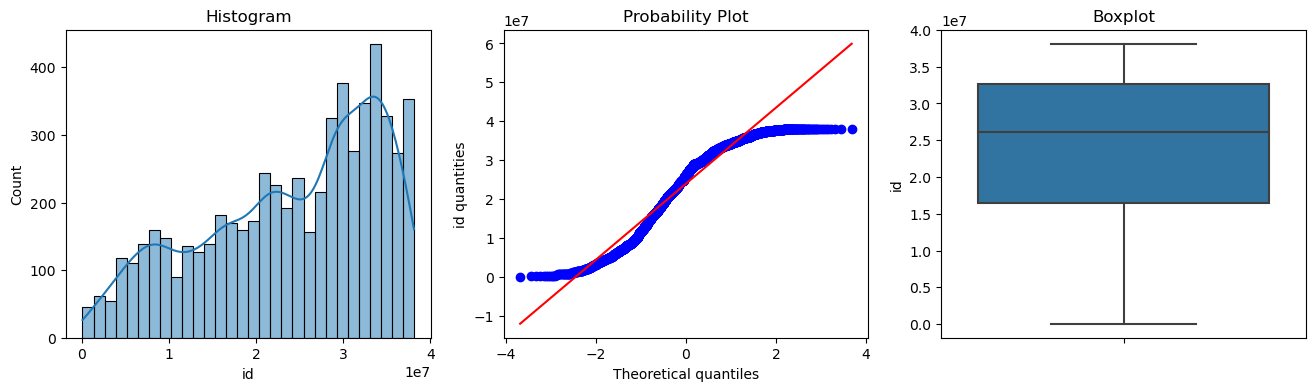

In [166]:
# Before
diagnostic_plots(df_listings_newBeforeTrans, 'id')

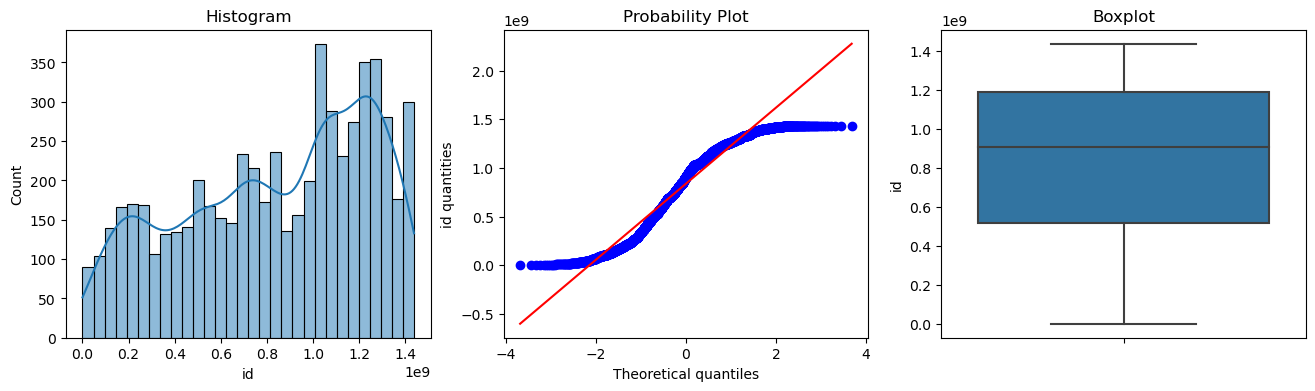

In [167]:
# After
diagnostic_plots(df_listings_new, 'id')

<b> Host ID </b>

In [168]:
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['host_id'], exp=1/2) # for sq root

# fit transformer to data 
et.fit(df_listings_new)
# transform indicated variables within our dataframe
df_listings_new = et.transform(df_listings_new)

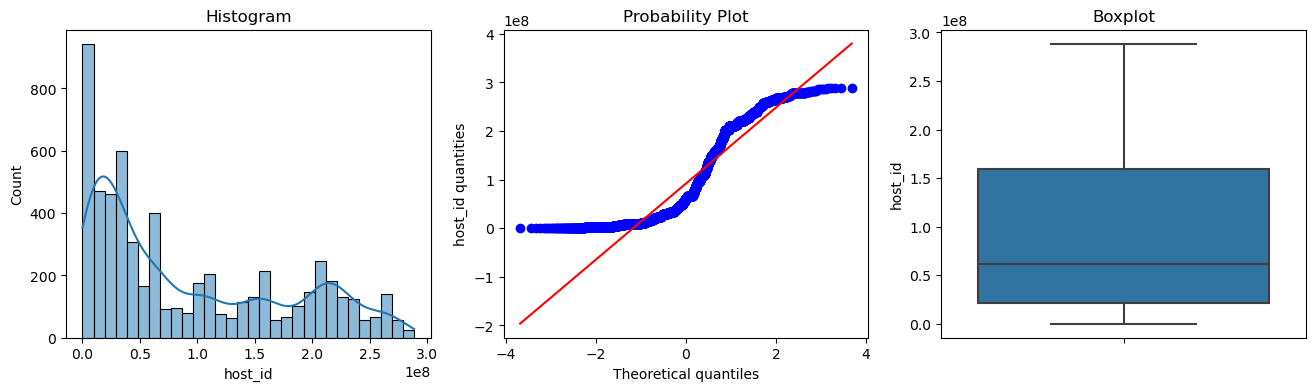

In [169]:
# Before
diagnostic_plots(df_listings_newBeforeTrans, 'host_id')

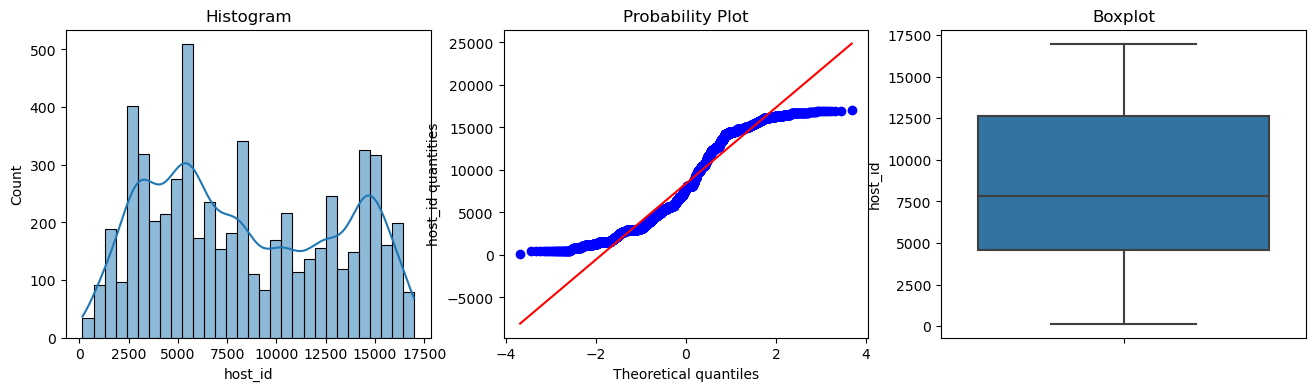

In [170]:
# After 
diagnostic_plots(df_listings_new, 'host_id')

<b> No. of Reviews </b>

In [171]:
df_listings_new['number_of_reviews'] += 1
# initialize the transformer with a group of variables to transform
bct = BoxCoxTransformer(variables = ['number_of_reviews'])

# fit transformer to the data set
bct.fit(df_listings_new)
# transform indicated variables within our dataframe
df_listings_new = bct.transform(df_listings_new)

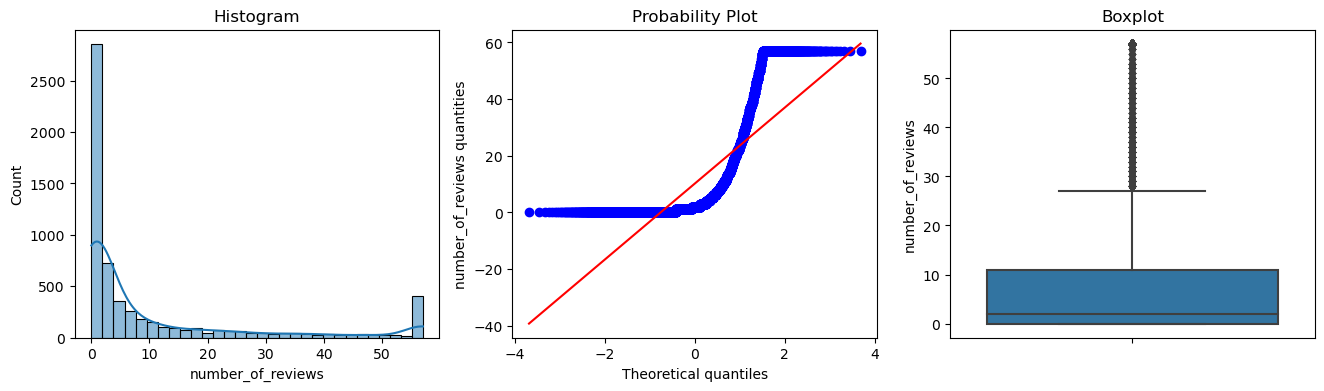

In [172]:
# Before
diagnostic_plots(df_listings_newBeforeTrans, 'number_of_reviews')

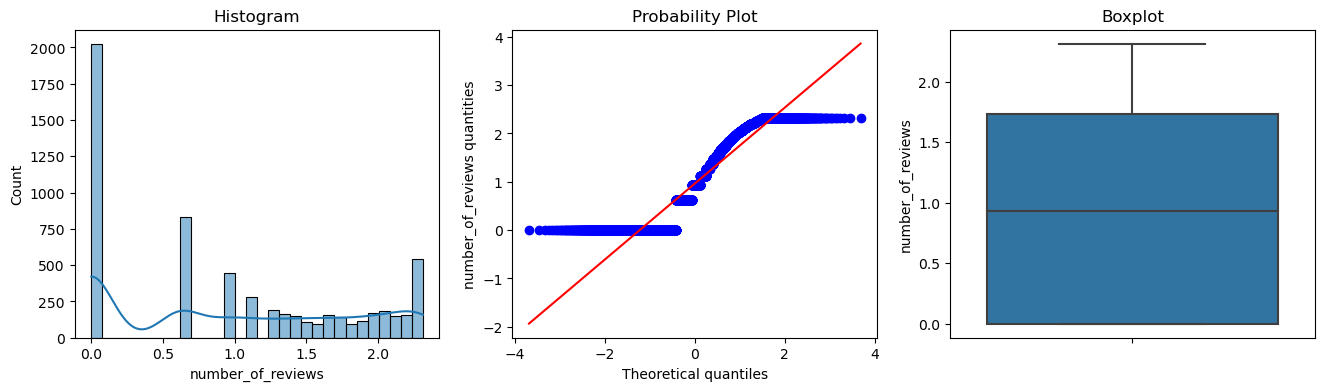

In [173]:
# After
diagnostic_plots(df_listings_new, 'number_of_reviews')

<b> Reviews per Month </b>

In [174]:
yjt = YeoJohnsonTransformer(variables = ['reviews_per_month'])

# fit transformer to the dataframe
yjt.fit(df_listings_new)
# transform indicated variables
df_listings_new = yjt.transform(df_listings_new)

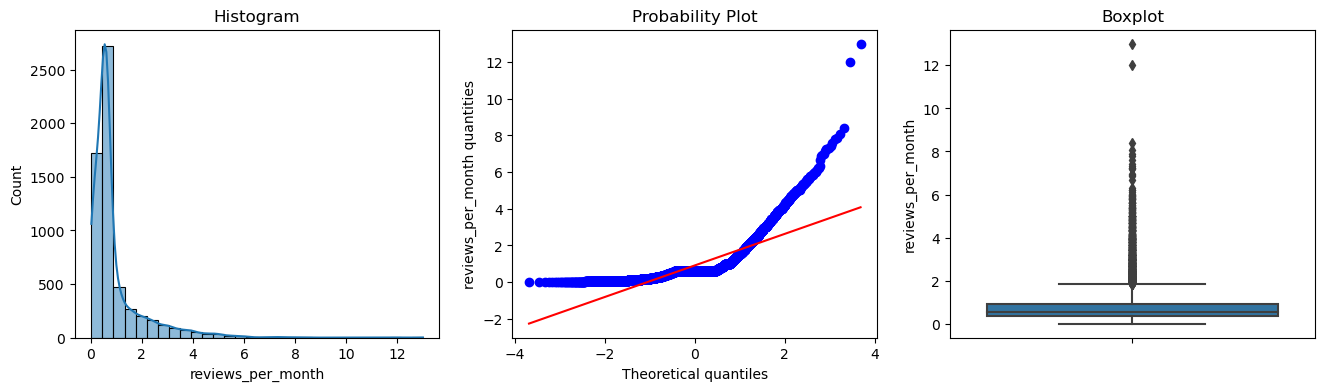

In [175]:
# Before
diagnostic_plots(df_listings_newBeforeTrans, 'reviews_per_month')

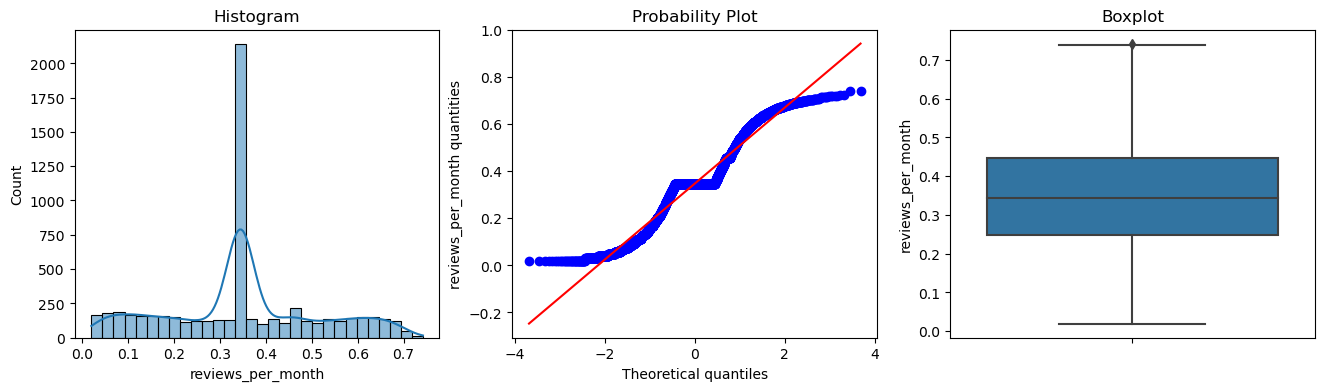

In [176]:
# After
diagnostic_plots(df_listings_new, 'reviews_per_month')

<b> Calculated Host Listings Count </b>

In [177]:
# initialize the transformer
lt = LogTransformer(variables=['calculated_host_listings_count'])

# fit transformer to data set
lt.fit(df_listings_new)
# transform variables within our data set
df_listings_new = lt.transform(df_listings_new)

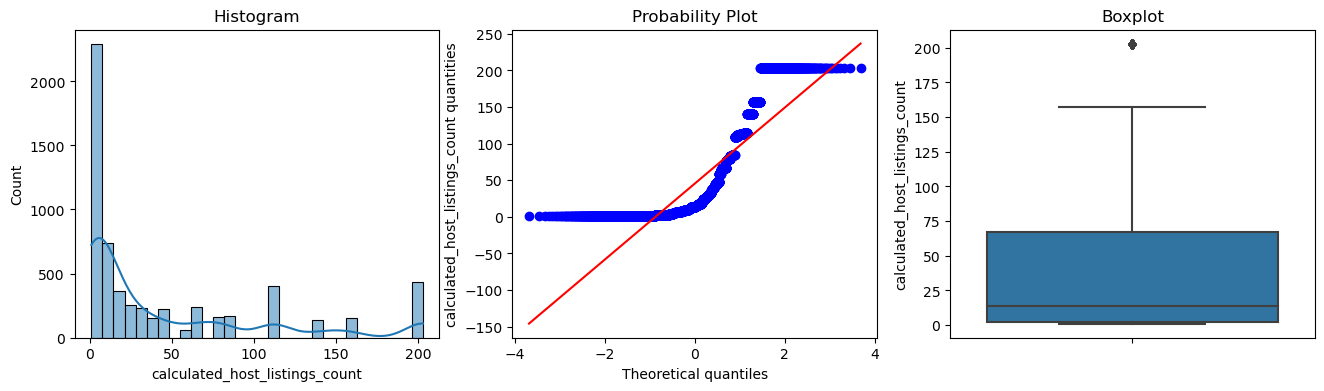

In [178]:
# Before
diagnostic_plots(df_listings_newBeforeTrans, 'calculated_host_listings_count')

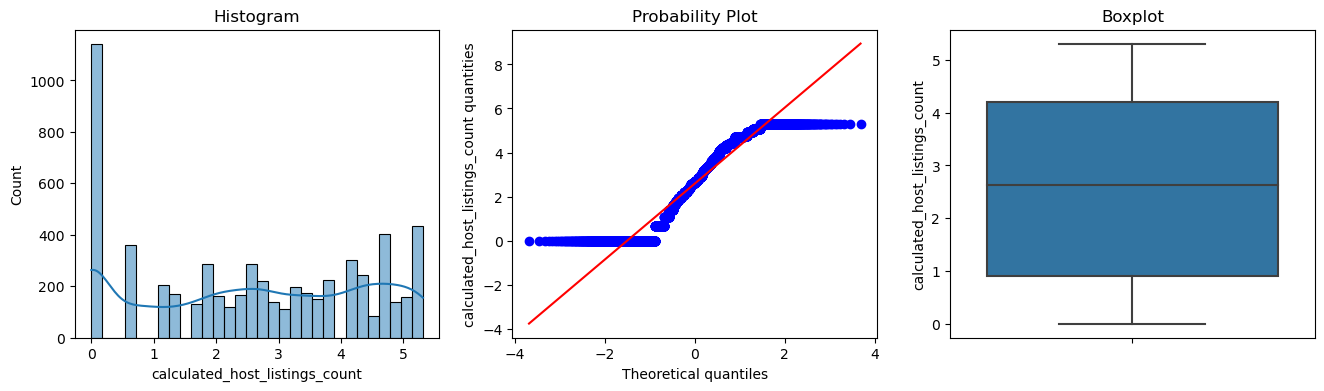

In [179]:
# After
diagnostic_plots(df_listings_new, 'calculated_host_listings_count')

### 2.2.6. Numerical Data (Discretization) <a id="2.2.6."></a>
[Back to Top](#top)

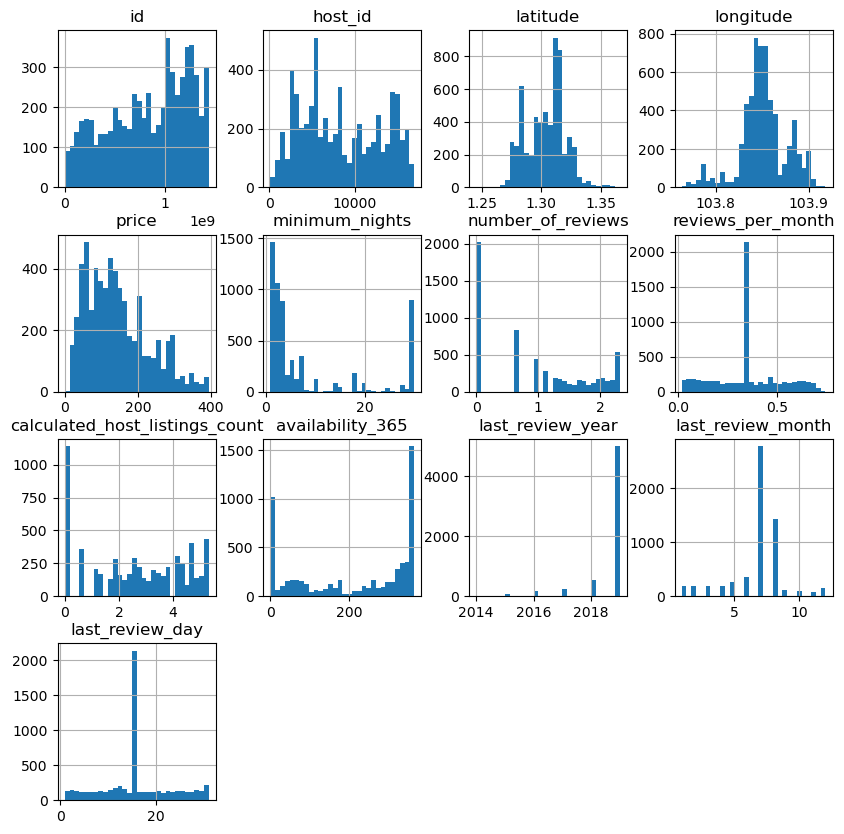

In [180]:
overviewOfNumCols = df_listings_new[num_cols].hist(bins=30, figsize=(10,10))
plt.show()

In [181]:
# with feature engine we can automate the process for many variables
# in one line of code

EWdisc = EqualWidthDiscretiser(bins=10, variables = ['id', 'minimum_nights', 'number_of_reviews',
                                                     'calculated_host_listings_count', 'availability_365'])

EWdisc.fit(df_listings_new)

EqualWidthDiscretiser(variables=['id', 'minimum_nights', 'number_of_reviews',
                                 'calculated_host_listings_count',
                                 'availability_365'])

In [182]:
EWdisc.binner_dict_

{'id': [-inf,
  144098800.36663175,
  287750787.76972586,
  431402775.17282,
  575054762.5759141,
  718706749.9790082,
  862358737.3821024,
  1006010724.7851965,
  1149662712.1882906,
  1293314699.5913846,
  inf],
 'minimum_nights': [-inf,
  3.9,
  6.8,
  9.7,
  12.6,
  15.5,
  18.4,
  21.3,
  24.2,
  27.099999999999998,
  inf],
 'number_of_reviews': [-inf,
  0.2315846384800635,
  0.463169276960127,
  0.6947539154401905,
  0.926338553920254,
  1.1579231924003175,
  1.389507830880381,
  1.6210924693604445,
  1.852677107840508,
  2.0842617463205713,
  inf],
 'calculated_host_listings_count': [-inf,
  0.5313205979041787,
  1.0626411958083575,
  1.5939617937125363,
  2.125282391616715,
  2.6566029895208936,
  3.1879235874250726,
  3.7192441853292513,
  4.25056478323343,
  4.7818853811376085,
  inf],
 'availability_365': [-inf,
  36.5,
  73.0,
  109.5,
  146.0,
  182.5,
  219.0,
  255.5,
  292.0,
  328.5,
  inf]}

In [183]:
# transform to dataset
df_listings_new = EWdisc.transform(df_listings_new)

Text(0, 0.5, 'Number of observations per bin')

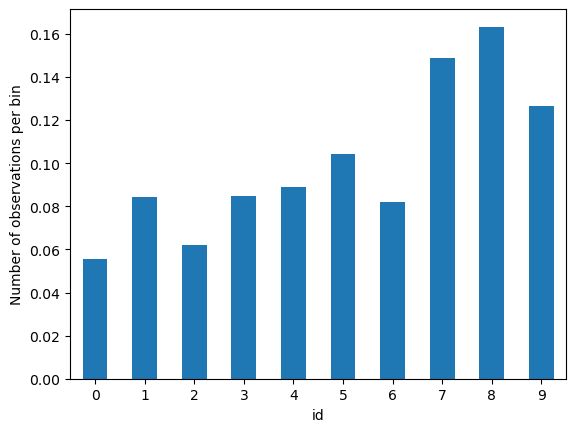

In [184]:
# id

t1 = df_listings_new.groupby(['id'])['id'].count() / len(df_listings_new)

tmp = t1
tmp.columns = ['id']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

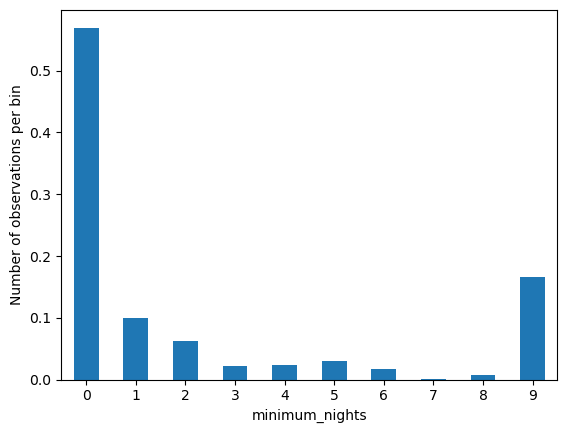

In [185]:
# minimum_nights

t1 = df_listings_new.groupby(['minimum_nights'])['minimum_nights'].count() / len(df_listings_new)

tmp = t1
tmp.columns = ['minimum_nights']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

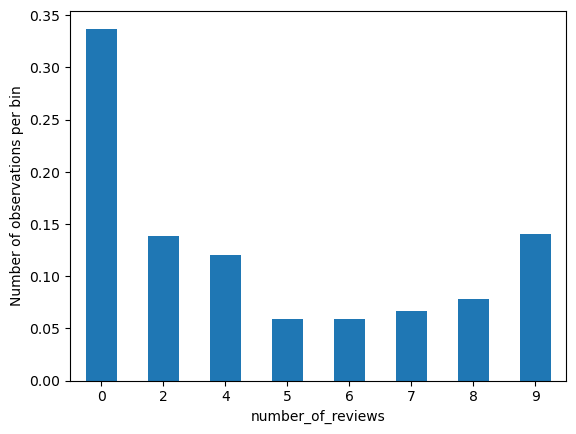

In [186]:
# number_of_reviews

t1 = df_listings_new.groupby(['number_of_reviews'])['number_of_reviews'].count() / len(df_listings_new)

tmp = t1
tmp.columns = ['number_of_reviews']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

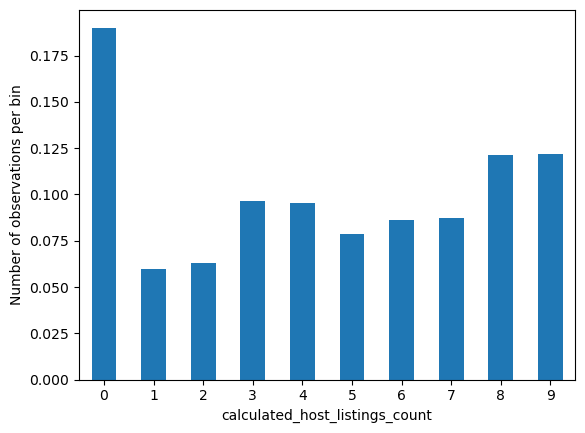

In [187]:
# calculated_host_listings_count

t1 = df_listings_new.groupby(['calculated_host_listings_count'])['calculated_host_listings_count'].count() / len(df_listings_new)

tmp = t1
tmp.columns = ['calculated_host_listings_count']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

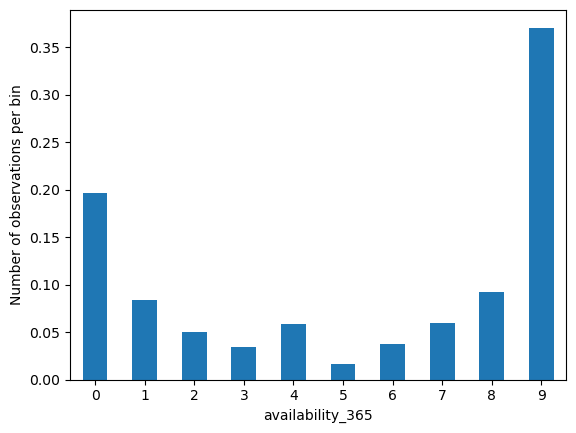

In [188]:
# availability_365

t1 = df_listings_new.groupby(['availability_365'])['availability_365'].count() / len(df_listings_new)

tmp = t1
tmp.columns = ['availability_365']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

### 2.2.7. Feature Scaling <a id="2.2.7."></a>
[Back to Top](#top)

In [189]:
# Dataset after binning
df_listings_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5995 entries, 1 to 7906
Data columns (total 45 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   id                                                      5995 non-null   int64  
 1   host_id                                                 5995 non-null   float64
 2   latitude                                                5995 non-null   float64
 3   longitude                                               5995 non-null   float64
 4   price                                                   5995 non-null   int64  
 5   minimum_nights                                          5995 non-null   int64  
 6   number_of_reviews                                       5995 non-null   int64  
 7   reviews_per_month                                       5995 non-null   float64
 8   calculated_host_listings_count        

In [190]:
df_listings_new.head()

id      host_id  latitude  longitude  price  minimum_nights  \
1    0   477.279792   1.33235  103.78521     81               9   
10   0  1199.690793   1.28875  103.80814     44               4   
11   0  1199.690793   1.28837  103.81099     40               9   
13   0  1233.496656   1.31125  103.83816     65               0   
14   0  1199.690793   1.28976  103.80896     44               9   

    number_of_reviews  reviews_per_month  calculated_host_listings_count  \
1                   8           0.211052                               0   
10                  8           0.181414                               6   
11                  7           0.097567                               6   
13                  9           0.515070                               3   
14                  7           0.127760                               6   

    availability_365  ...  neighbourhood_Novena  neighbourhood_Downtown Core  \
1                  9  ...                     0                            0   
10                 9  ...                     0                            0   
11                 7  ...                     0                            0   
13                 9  ...                     0                            0   
14                 9  ...                     0                            0   

    neighbourhood_Singapore River  neighbourhood_Orchard  \
1                               0                      0   
10                              0                      0   
11                              0                      0   
13                              0                      0   
14                              0                      0   

    neighbourhood_Museum  neighbourhood_Bishan  \
1                      0                     0   
10                     0                     0   
11                     0                     0   
13                     0                     0   
14                     0                     0   

    neighbourhood_Southern Islands  room_type_Private room  \
1                                0                       1   
10                               0                       1   
11                               0                       1   
13                               0                       1   
14                               0                       1   

    room_type_Entire home/apt  room_type_Shared room  
1                           0                      0  
10                          0                      0  
11                          0                      0  
13                          0                      0  
14                          0                      0  

[5 rows x 45 columns]

In [191]:
# set up the scaler
scaler = StandardScaler()

colsToScale = ['id','host_id','latitude','longitude','minimum_nights','number_of_reviews',
               'reviews_per_month','calculated_host_listings_count','availability_365','last_review_year',
               'last_review_month','last_review_day']
# Fitting then transformation 
df_listings_new[colsToScale] = scaler.fit_transform(df_listings_new[colsToScale])

In [192]:
df_listings_new.head()

id   host_id  latitude  longitude  price  minimum_nights  \
1  -1.904385 -1.714913  1.742860  -2.607617     81        2.005860   
10 -1.904385 -1.558300 -0.927086  -1.701976     44        0.529333   
11 -1.904385 -1.558300 -0.950356  -1.589413     40        2.005860   
13 -1.904385 -1.550971  0.450753  -0.516309     65       -0.651888   
14 -1.904385 -1.558300 -0.865236  -1.669589     44        2.005860   

    number_of_reviews  reviews_per_month  calculated_host_listings_count  \
1            1.245344          -0.820934                       -1.411140   
10           1.245344          -0.999405                        0.493502   
11           0.951205          -1.504306                        0.493502   
13           1.539483           1.009771                       -0.458819   
14           0.951205          -1.322494                        0.493502   

    availability_365  ...  neighbourhood_Novena  neighbourhood_Downtown Core  \
1           0.988777  ...                     0                            0   
10          0.988777  ...                     0                            0   
11          0.451140  ...                     0                            0   
13          0.988777  ...                     0                            0   
14          0.988777  ...                     0                            0   

    neighbourhood_Singapore River  neighbourhood_Orchard  \
1                               0                      0   
10                              0                      0   
11                              0                      0   
13                              0                      0   
14                              0                      0   

    neighbourhood_Museum  neighbourhood_Bishan  \
1                      0                     0   
10                     0                     0   
11                     0                     0   
13                     0                     0   
14                     0                     0   

    neighbourhood_Southern Islands  room_type_Private room  \
1                                0                       1   
10                               0                       1   
11                               0                       1   
13                               0                       1   
14                               0                       1   

    room_type_Entire home/apt  room_type_Shared room  
1                           0                      0  
10                          0                      0  
11                          0                      0  
13                          0                      0  
14                          0                      0  

[5 rows x 45 columns]

In [193]:
# Shifting target to last column
df_listings_new = df_listings_new.reindex(columns = [col for col in df_listings_new.columns if col != 'price'] + ['price'])
df_listings_new

id   host_id  latitude  longitude  minimum_nights  \
1    -1.904385 -1.714913  1.742860  -2.607617        2.005860   
10   -1.904385 -1.558300 -0.927086  -1.701976        0.529333   
11   -1.904385 -1.558300 -0.950356  -1.589413        2.005860   
13   -1.904385 -1.550971  0.450753  -0.516309       -0.651888   
14   -1.904385 -1.558300 -0.865236  -1.669589        2.005860   
...        ...       ...       ...        ...             ...   
7901  1.319684  1.796993 -1.479446  -2.516777       -0.651888   
7902  1.319684  1.796993 -1.479446  -2.516777       -0.651888   
7904  1.319684  1.818629  0.549345   0.344702        2.005860   
7905  1.319684  1.566888 -0.518020  -0.522233        0.529333   
7906  1.319684 -0.655182 -0.439024  -0.710234        2.005860   

      number_of_reviews  reviews_per_month  calculated_host_listings_count  \
1              1.245344          -0.820934                       -1.411140   
10             1.245344          -0.999405                        0.493502   
11             0.951205          -1.504306                        0.493502   
13             1.539483           1.009771                       -0.458819   
14             0.951205          -1.322494                        0.493502   
...                 ...                ...                             ...   
7901          -1.107768          -0.017515                        0.493502   
7902          -1.107768          -0.017515                        0.493502   
7904          -1.107768          -0.017515                       -0.776260   
7905          -1.107768          -0.017515                       -1.093700   
7906          -1.107768          -0.017515                       -0.458819   

      availability_365  last_review_year  ...  neighbourhood_Downtown Core  \
1             0.988777         -6.262193  ...                            0   
10            0.988777          0.382382  ...                            0   
11            0.451140         -0.946533  ...                            0   
13            0.988777          0.382382  ...                            0   
14            0.988777          0.382382  ...                            0   
...                ...               ...  ...                          ...   
7901         -1.161772          0.382382  ...                            0   
7902         -1.161772          0.382382  ...                            0   
7904         -0.355316          0.382382  ...                            0   
7905         -1.430591          0.382382  ...                            0   
7906          0.988777          0.382382  ...                            0   

      neighbourhood_Singapore River  neighbourhood_Orchard  \
1                                 0                      0   
10                                0                      0   
11                                0                      0   
13                                0                      0   
14                                0                      0   
...                             ...                    ...   
7901                              0                      0   
7902                              0                      0   
7904                              0                      0   
7905                              0                      0   
7906                              0                      0   

      neighbourhood_Museum  neighbourhood_Bishan  \
1                        0                     0   
10                       0                     0   
11                       0                     0   
13                       0                     0   
14                       0                     0   
...                    ...                   ...   
7901                     0                     0   
7902                     0                     0   
7904                     0                     0   
7905                     0                     0   
7906                     0              

### 2.3 Correlation Analysis <a id="2.3."></a>
[Back to Top](#top)

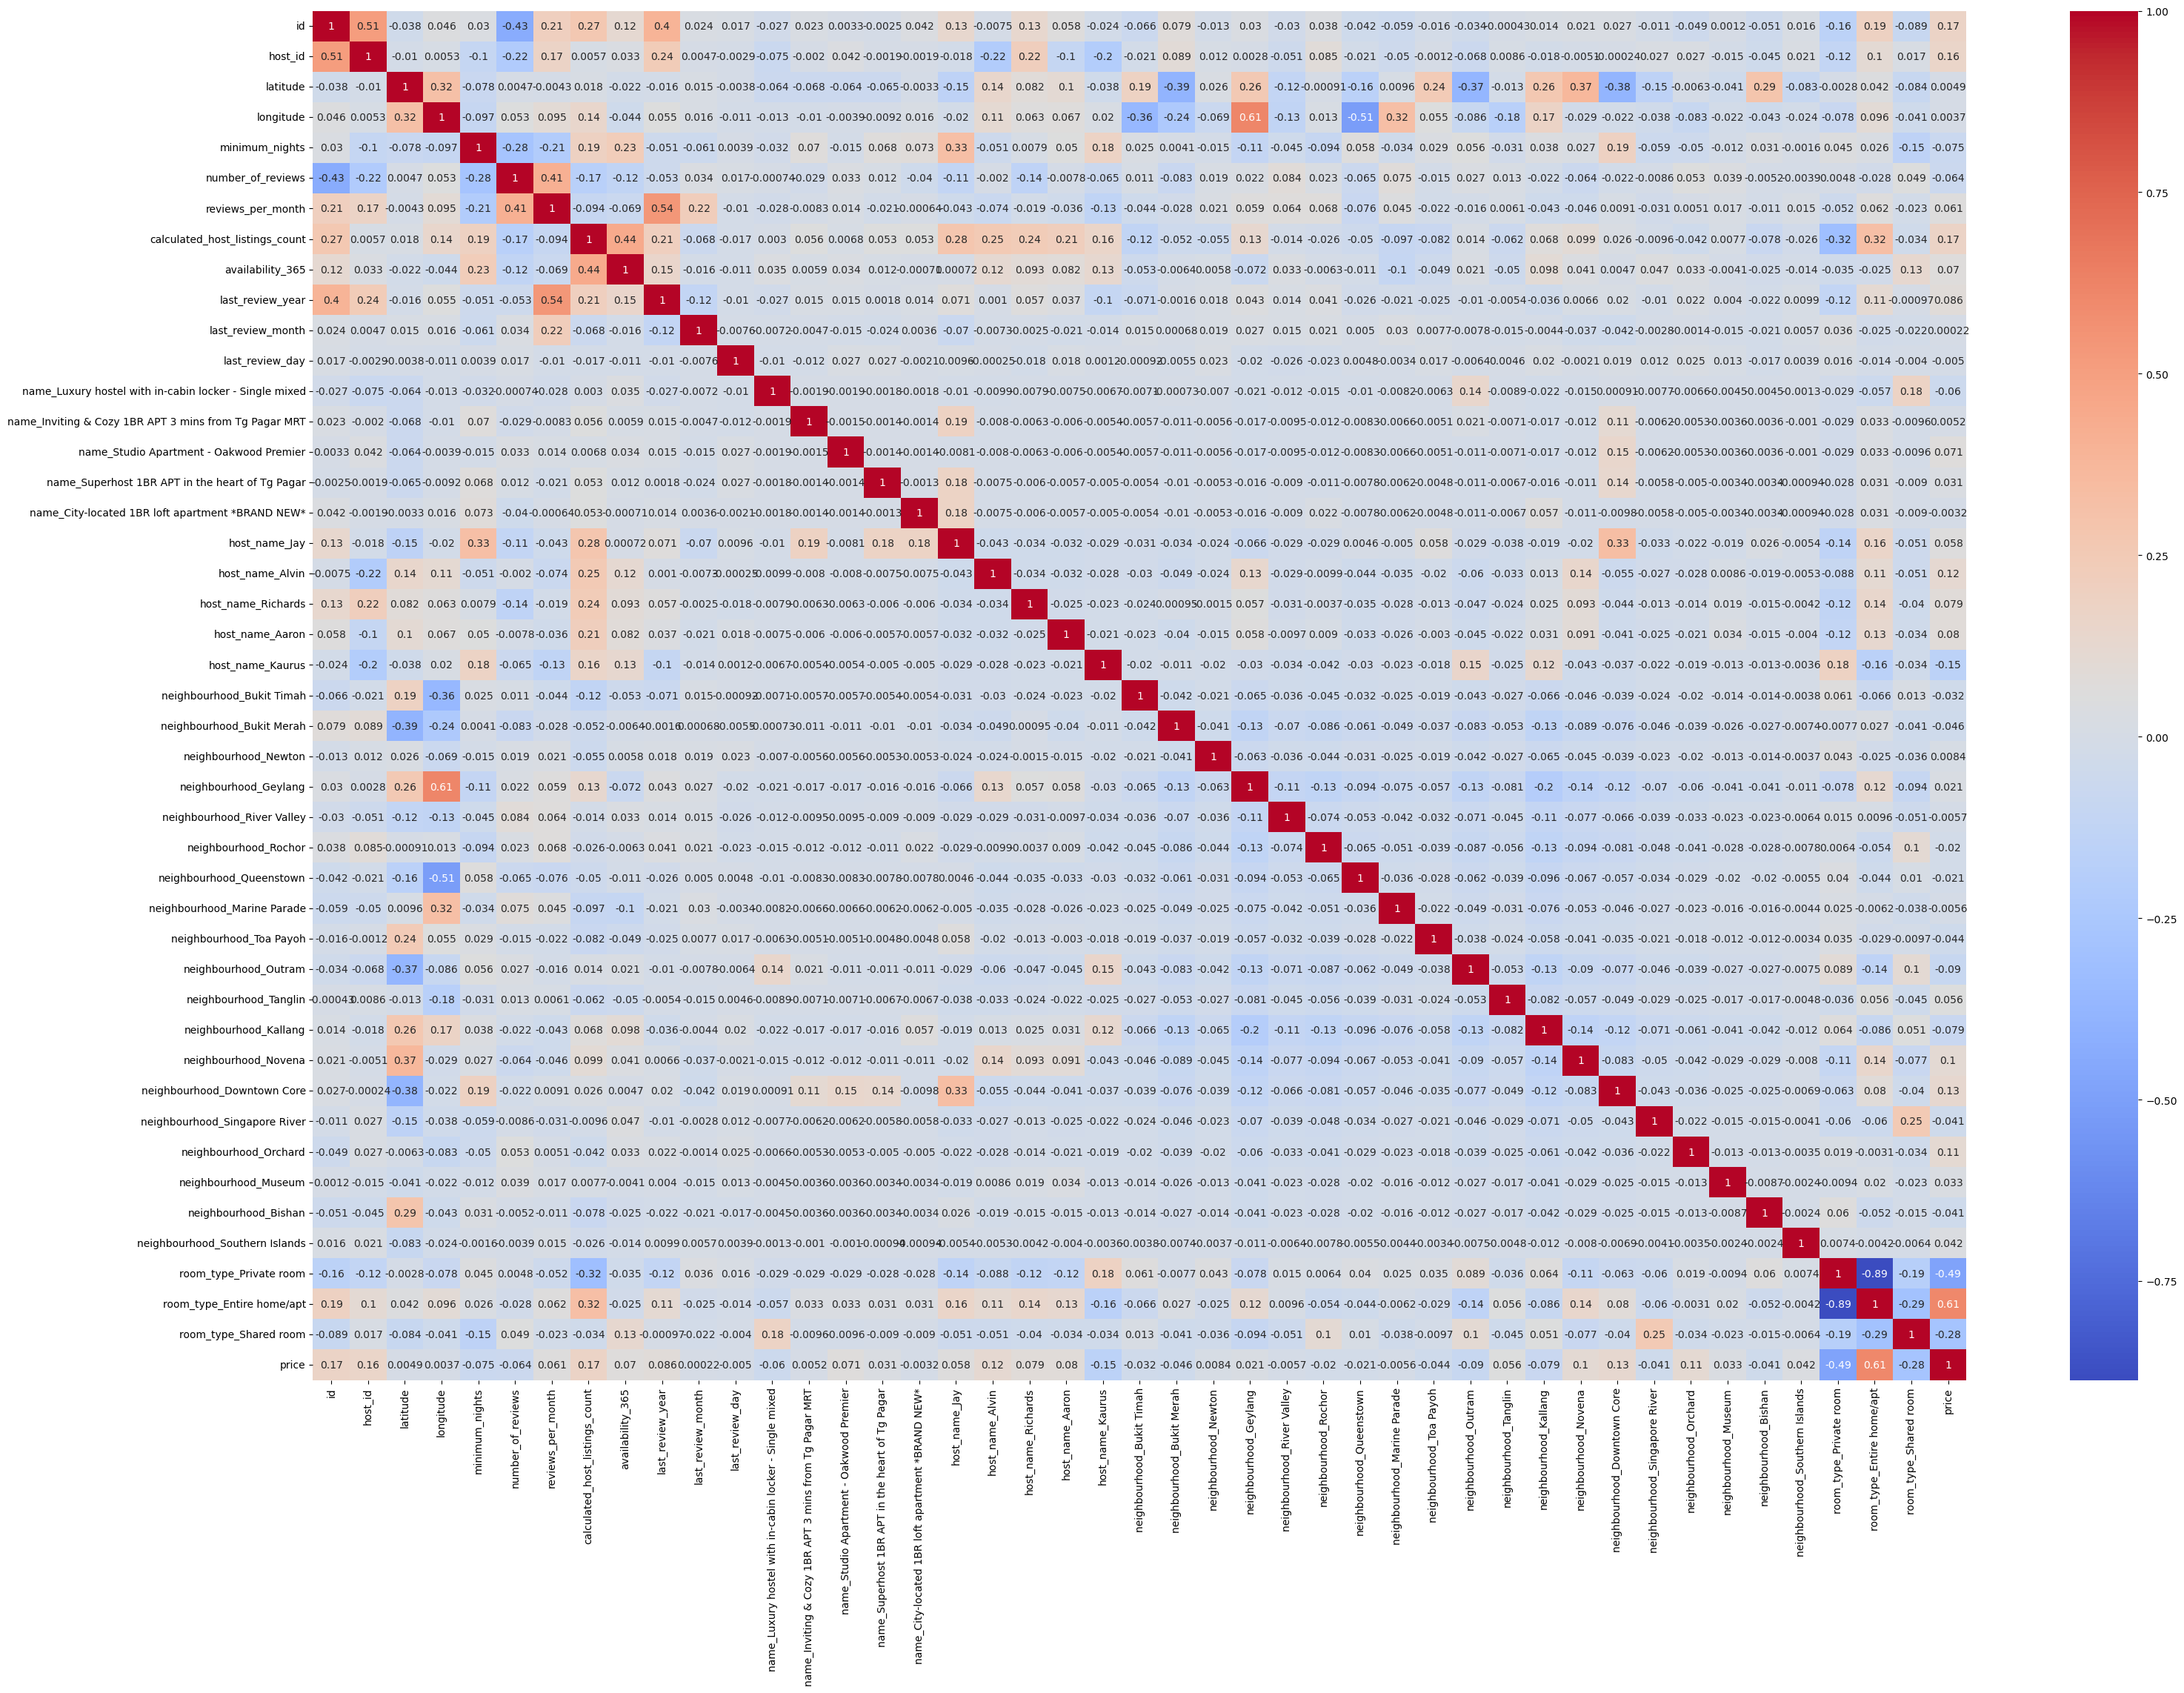

In [194]:
# "Double Click and drag left and right to have a clearer picture"
# Set figure size with matplotlib
plt.figure(figsize=(36,24))

# Calculate correlations of feature-pairs in df_stats
corr = df_listings_new.corr()

# Create heatmap
sns.heatmap(corr,cmap='coolwarm',annot=True)

# Display the plot
plt.show()

<b> Relationship between Room Type - Private Room </b>

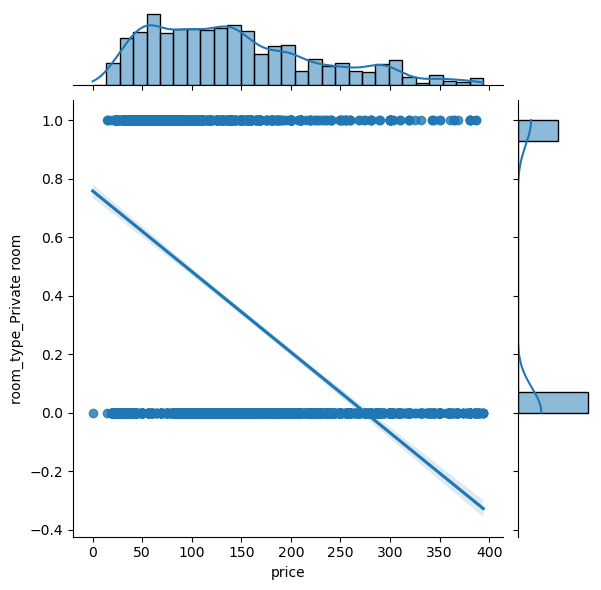

In [195]:
# Joint Distribution Plot
sns.jointplot(x='price', y='room_type_Private room', data=df_listings_new,kind="reg")

# Display the plot
plt.show()

<b> Relationship between Room Type - Entire home/ Apartment </b>

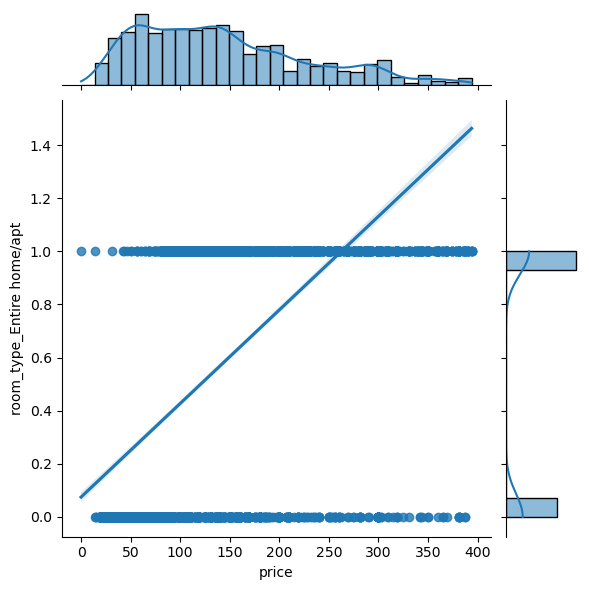

In [196]:
# Joint Distribution Plot
sns.jointplot(x='price', y='room_type_Entire home/apt', data=df_listings_new,kind="reg")

# Display the plot
plt.show()

<b> Relationship between Room Type - Shared Room </b>

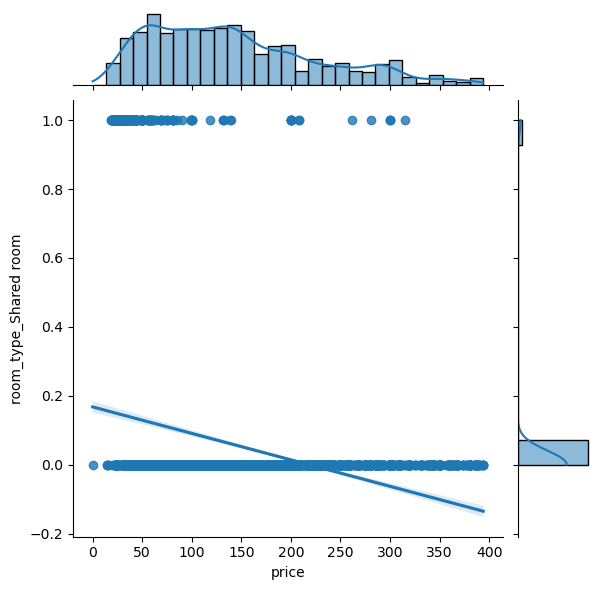

In [197]:
# Joint Distribution Plot
sns.jointplot(x='price', y='room_type_Shared room', data=df_listings_new,kind="reg")

# Display the plot
plt.show()

### 2.4 Export the data <a id="2.4."></a>
[Back to Top](#top)

In [198]:
#export without the index
df_listings_new.to_csv('listings_new.csv', index = False)

### Load into Machine Learning Model for Testing

In [199]:
X_train, X_test, y_train, y_test = train_test_split(
    df_listings_new.drop('price', axis=1), df_listings_new['price'], test_size=0.3, random_state=999)

X_train.shape, X_test.shape

((4196, 44), (1799, 44))

In [200]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

# Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
# The lower MSE, the better the model performance
print('train_rmse:', mean_squared_error(y_train, model_linear_regression.predict(X_train)), 
      '\n test_rmse:', mean_squared_error(y_test, model_linear_regression.predict(X_test)))
print()
# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test)))
print()
# Evaluate the Linear Regression Model using Mean Absoulte Error (MAE)
# The lower MAE, the better the model performance
print('train_mae:', mean_absolute_error(y_train, model_linear_regression.predict(X_train)), 
      '\n test_mae:', mean_absolute_error(y_test, model_linear_regression.predict(X_test)))

train_rmse: 3694.921138762833 
 test_rmse: 4250.98659079734

train_r-sq: 0.4805366518263572 
 test_r-sq: 0.43245771711306236

train_mae: 46.215335979706 
 test_mae: 48.52366665248343
